In [1]:
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import HARP_and_age as haa

import pickle
import importlib

import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u

In [2]:
with open('/Users/jmdunca2/do-dem/reference_files/all_targets_postghost_postshut.pickle', 'rb') as f:
    all_targets = pickle.load(f)

In [3]:
def get_same_region_file_lists(samesames, all_targets, get_agelists=False, noxrt=False, aiaxrt=False):

    #For the list of lists of region names, make a file list for every separate region
    filelist = []
    if get_agelists:
        agelist=[]
    for s in samesames:
        ss_filelist=[]
        if get_agelists:
            ss_agelist=[]
        #For each key-region combo in the list of instances of this region
        for ss in s:
            #sub-keys in the key
            sks = all_targets[ss.split(' ')[0]]['sub_keys']
            #for each sub-key
            for i in range(0, len(sks)):
                #if the sub-key is the key-region combo we want...
                if sks[i] == ss:
                    #print(ss.split(' ')[0], i)
                    if noxrt:
                        ss_filelist.extend(all_targets[ss.split(' ')[0]]['res_file_dict(s)'][i]['quiet files no_xrt'])
                    elif aiaxrt:
                        ss_filelist.extend(all_targets[ss.split(' ')[0]]['res_file_dict(s)'][i]['quiet files aiaxrt'])
                    else:
                        ss_filelist.extend(all_targets[ss.split(' ')[0]]['res_file_dict(s)'][i]['quiet files all-inst'])
                    if get_agelists:
                        #print(ss.split(' ')[0], i)
                        #print(all_targets[ss.split(' ')[0]]['Region Ages'])
                        ss_agelist.append(all_targets[ss.split(' ')[0]]['Region Ages'][i])
                        
        filelist.append(ss_filelist)
        if get_agelists:
            agelist.append(ss_agelist)

    if get_agelists:
        return filelist, agelist
    else:
        return filelist


In [4]:
all_targets['20-jan-21']['method']

'fit'

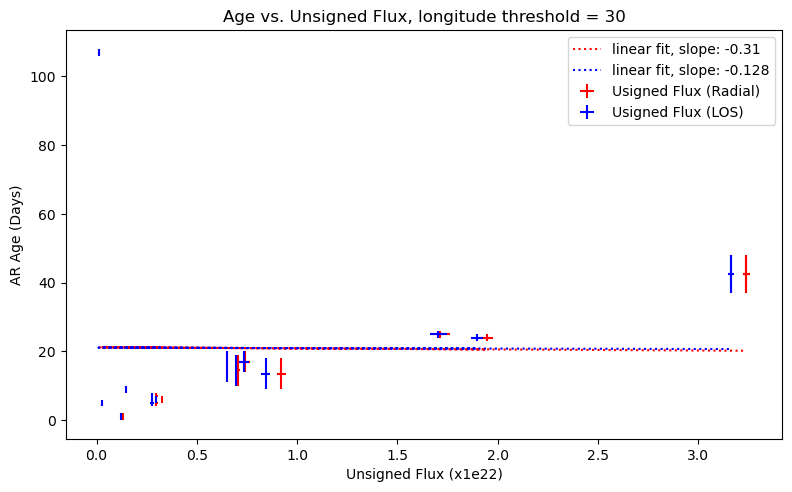

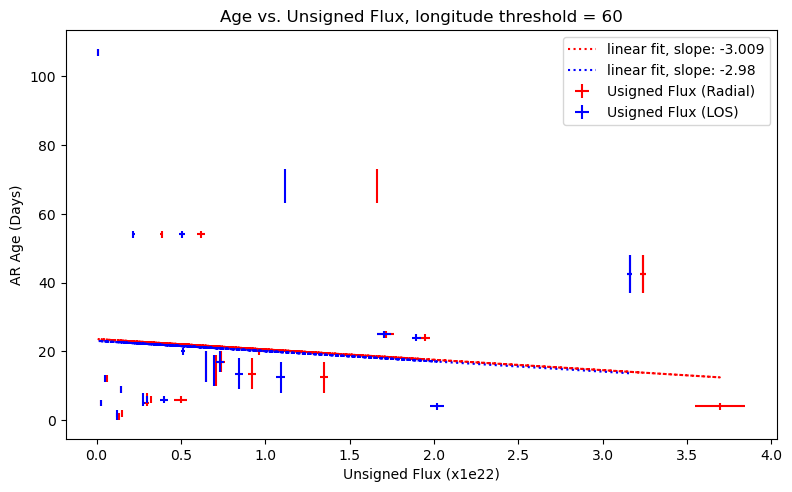

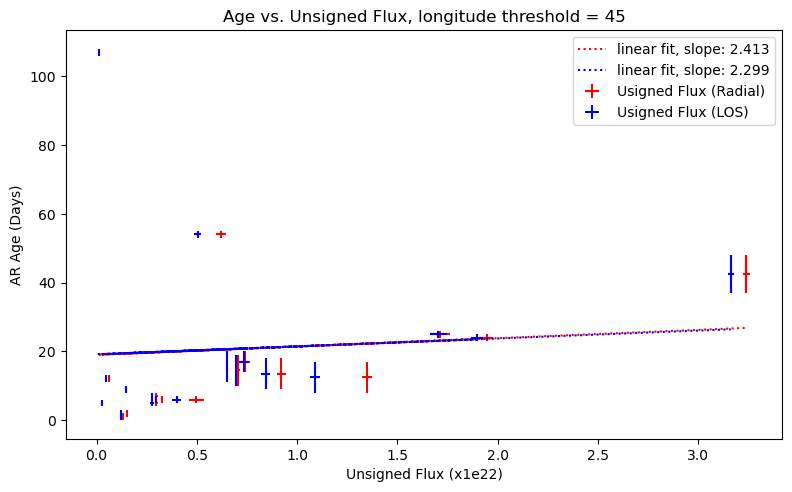

In [4]:
#Unsigned flux vs. AGE

#ages, hparr, hparl, heli, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=30)
magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=30)
print('')
magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60)
print('')
#ages, hparr, hparl, heli, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=45)
magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=45)

#ages, hparr, hparl, heli, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=45)
#magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=80)

/Users/jmdunca2/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jmdunca2/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/jmdunca2/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jmdunca2/miniforge3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jmdunca2/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jmdunca2/do-dem//dodem/HARP_and_age.py:795: RuntimeWarning: invalid value

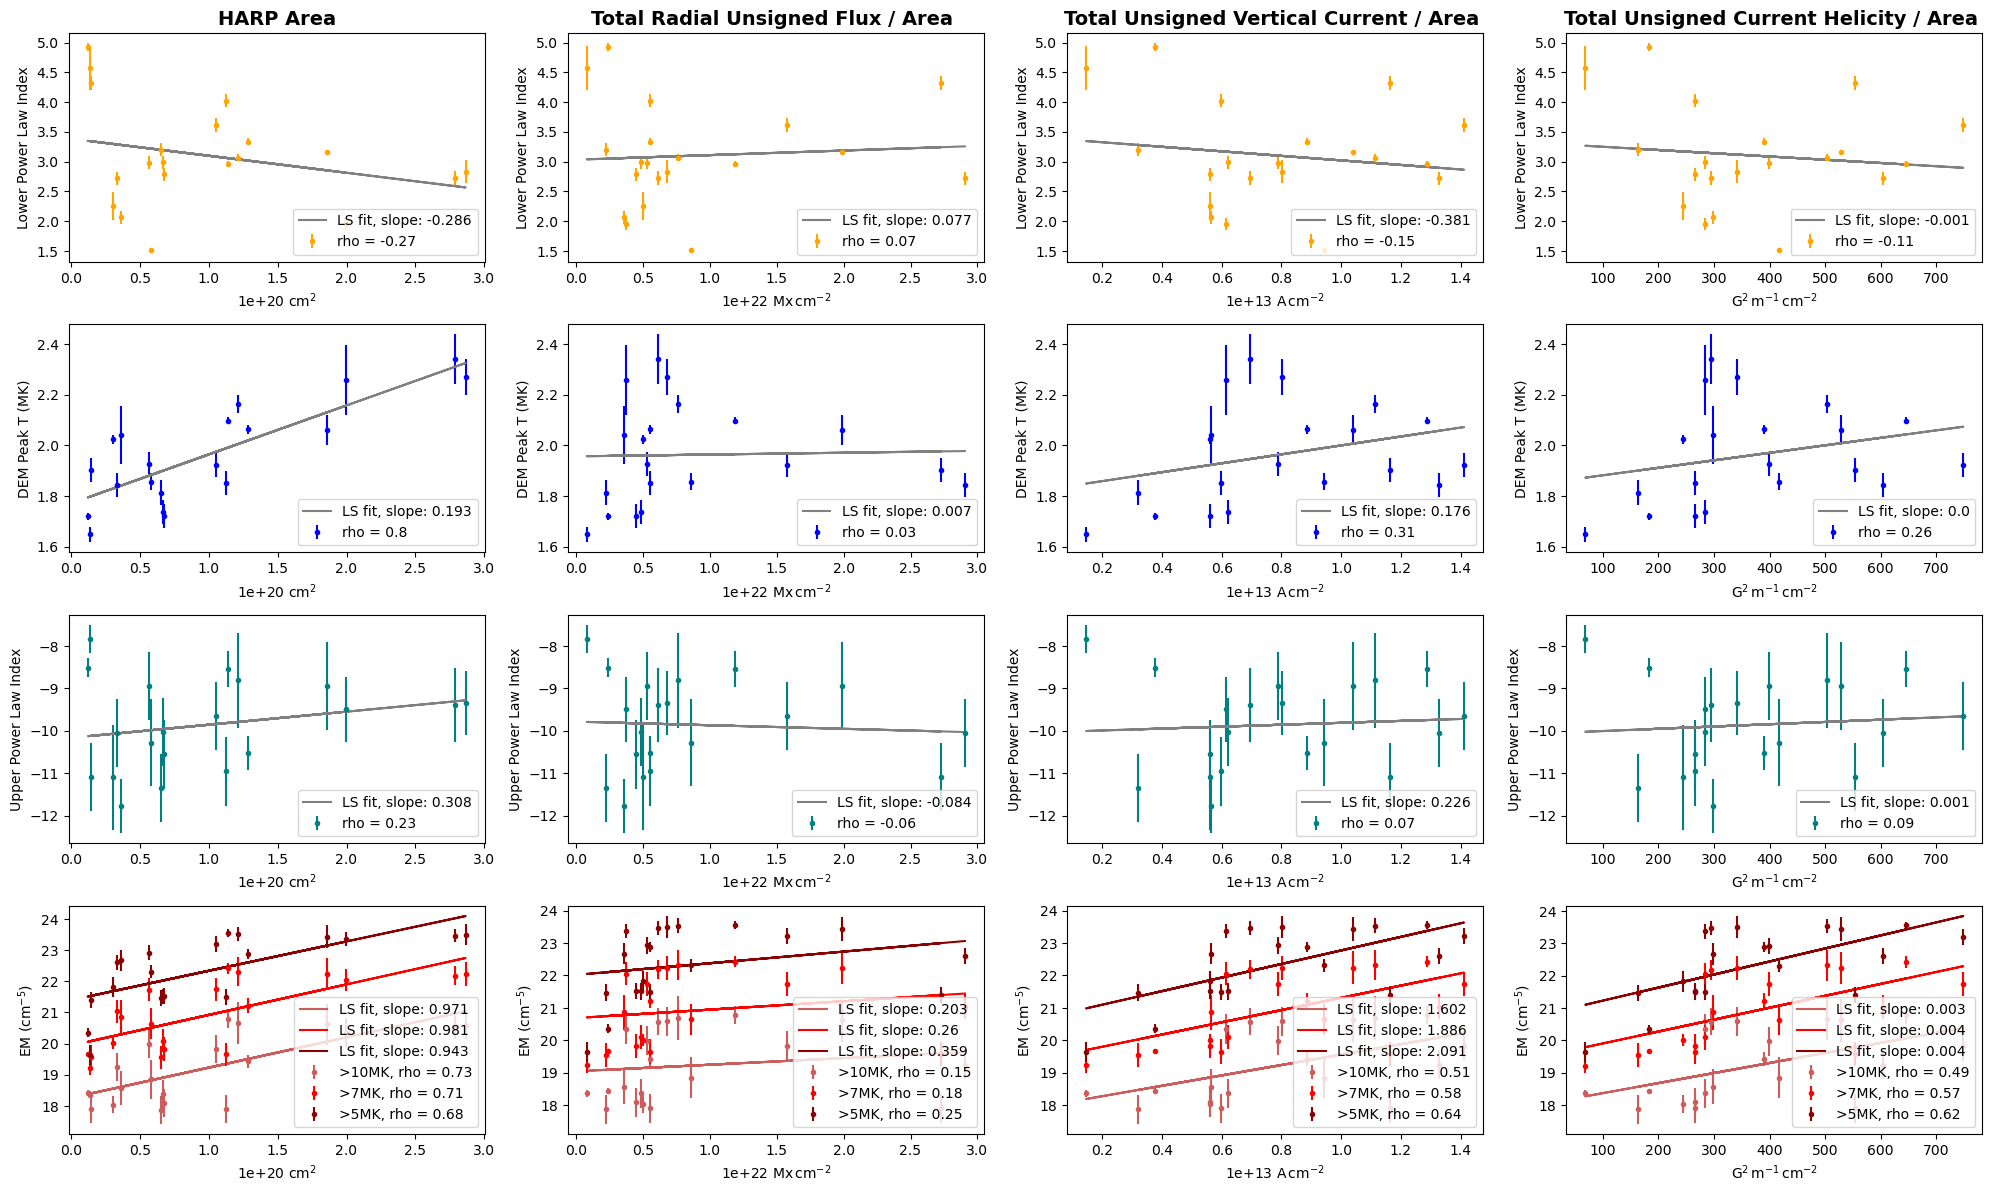

In [6]:
#MEGAPLOT - NICE VERSION
#We do want to normalize other parameters by HARP area, and also add a plot vs. HARP area. 
importlib.reload(haa)

params = ['lowerpower2', 'peak', 'upperpower2', 'above10', 'above7', 'above5']
paramlabels = ['Lower Power Law Index', 'DEM Peak T (MK)', 'Upper Power Law Index', 
               'EM ('+(u.cm**(-5)).to_string('latex_inline')+')',
              'EM ('+(u.cm**(-5)).to_string('latex_inline')+')',
              'EM ('+(u.cm**(-5)).to_string('latex_inline')+')']
tcolors = ['orange', 'blue', 'teal', 'indianred', 'red', 'darkred']
skh = [False, False, False, False, False, False]

mparams = ['areas', 'usflx', 'tuvc', 'tuheli'] #['areas', 'mheli', 'malp']
normcheck = [False, True, True, True] #[False, False, False]

magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)

regions = magparams['regions']['vals']

#fig, axes = plt.subplots(len(params),len(mparams), figsize=(5*len(mparams), 3*len(params)), tight_layout = {'pad': 1})
fig, axes = plt.subplots(4,len(mparams), figsize=(5*len(mparams), 3*4), tight_layout = {'pad': 1})


#For each DEM parameter
for i in range(0, len(params)):
    #For each magnetic parameter
    for j in range(0, len(mparams)):

        #Get the DEM parameter values, ages, standard deviations (of parameter values), and sub-region labels
        #for all regions.
        dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                    skiphuh=skh[i])

        #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
        trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
        yerr_ = stdvs[trs]
        wwy = [1/y for y in yerr_]
        

        #Plot vs. radial unsigned flux.
        if params[i] in ['above5', 'above7']:
            ax=axes[3,j]
        else:
            ax=axes[i,j]
        magpar=magparams[mparams[j]]['vals']
        #Normalize by region area for all parameters where it's selected in normcheck above. Don't normalize area by area.
        if normcheck[j]:
            norm=magparams[mparams[j]]['norm']*(magparams['areas']['vals'][:,0]/1e20)
        else:
            norm=magparams[mparams[j]]['norm']

        herr = magpar[:,1]/norm 
        wwx = [1/y for y in herr]
    
        #[print(s) if (s not in sks) else print('') for s in regions]
        rho=round(np.corrcoef(magpar[:,0]/norm, dataparam[trs,0])[0,1],2)
        #print(rho)
        if params[i] in ['above5', 'above7', 'above10']:
            extra_labs = ['>10MK', '>7MK', '>5MK']
            ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3, label=extra_labs[i-3]+', '+'rho = '+str(rho))
        else:    
            ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3, label='rho = '+str(rho))

        # #Fit option with y weights only
        m, b = np.polyfit(magpar[:,0]/norm, dataparam[trs,0], 1) #, w=wwy)
        fity = np.array(magpar[:,0]/norm)*m + b
        if params[i] in ['above5', 'above7', 'above10']:
            ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color=tcolors[i]) 
        else:
            ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')
            
        #print(m)

        if i==0 and j==0:
            import copy
            savemg = copy.deepcopy(magpar[:,0]/norm)
            saved = copy.deepcopy(dataparam[trs,0])
            swwy = copy.deepcopy(wwy)
        
        fsz=14
        fw='bold'
        if normcheck[j]:
            normunit = magparams[mparams[j]]['unit']/magparams['areas']['unit']
            
            if magparams[mparams[j]]['norm'] != 1:
                #ax.set_xlabel(magparams[mparams[j]]['name']+'/ HARP Area ('+"{:.0e}".format(magparams[mparams[j]]['norm'])+' '+normunit.to_string('latex_inline')+')')
                ax.set_xlabel("{:.0e}".format(magparams[mparams[j]]['norm'])+' '+normunit.to_string('latex_inline'))
                if i==0:
                    ax.set_title(magparams[mparams[j]]['name']+' / Area ', fontweight=fw, fontsize=fsz)
            else:
                #ax.set_xlabel(magparams[mparams[j]]['name']+'/ HARP Area ('+normunit.to_string('latex_inline')+')')
                ax.set_xlabel(normunit.to_string('latex_inline'))
                if i==0:
                    ax.set_title(magparams[mparams[j]]['name']+' / Area ', fontweight=fw, fontsize=fsz)
        else:
            if magparams[mparams[j]]['norm'] != 1:
                #ax.set_xlabel(magparams[mparams[j]]['name']+' ('+"{:.0e}".format(magparams[mparams[j]]['norm'])+' '+magparams[mparams[j]]['unit'].to_string('latex_inline')+')')
                ax.set_xlabel("{:.0e}".format(magparams[mparams[j]]['norm'])+' '+magparams[mparams[j]]['unit'].to_string('latex_inline'))
                if i==0:
                    ax.set_title(magparams[mparams[j]]['name'], fontweight=fw, fontsize=fsz)
            else:
                #ax.set_xlabel(magparams[mparams[j]]['name']+' ('+magparams[mparams[j]]['unit'].to_string('latex_inline')+')')
                ax.set_xlabel(magparams[mparams[j]]['unit'].to_string('latex_inline'))
                #For when running with mean params, above doesn't work.
                #ax.set_xlabel(magparams[mparams[j]]['unit'])
                if i==0:
                    ax.set_title(magparams[mparams[j]]['name'], fontweight=fw, fontsize=fsz)
            
        ax.set_ylabel(paramlabels[i])
        ax.legend(loc='lower right')


plt.savefig('all_mag_params_area_normalized_extensive.png')


In [4]:

def make_labels(regids):
    

    arlabs=[]
    for r in regids:
        ss = r[0]
        ars = all_targets[ss.split(' ')[0]]['NOAA_ARID']
        locs = all_targets[ss.split(' ')[0]]['loc']
        if len(locs) == 1:
            arlabs.append(all_targets[ss.split(' ')[0]]['NOAA_ARID'][0])
        else:
            if ss[-1]=='0':
                arlabs.append(all_targets[ss.split(' ')[0]]['NOAA_ARID'][0])
            elif ss[-1]=='1':
                arlabs.append(all_targets[ss.split(' ')[0]]['NOAA_ARID'][1])

    #Making labels
    labs=[]
    #For each region
    for r in regids:
        #print(r)
        lab=''
        first=0
        # if 1 == 2:
        #     numstr = ' '
        # else:
        numstr = '' #' #'+str(int(r[0][-1])+1)
        #For each day it was observed
        for ss in r:
            #If it's the first day...
            if first == 0:
                #If the first character is 0 (aka day of month < 10)
                if ss[0] == '0':
                    #'#'+str(int(ss[-1])+1)+
                    lab=lab+ss[1:9]+numstr+' '
                else: 
                    #
                    lab=lab+ss[0:9]+numstr+' '
                first=1
                #print(lab)
            else:
                if ss[0] == '0':
                    lab=ss[1:2]+','+lab
                else:    
                    lab=ss[0:2]+','+lab
    
        labs.append(lab)
    
    plotlabs = [labs[i]+arlabs[i] for i in range(0, len(labs))]

    return plotlabs

[[1.25555564e+21]
 [1.15717552e+22]]
[[1.56578466e+21]
 [1.89658424e+21]]
[[0.]
 [0.]]



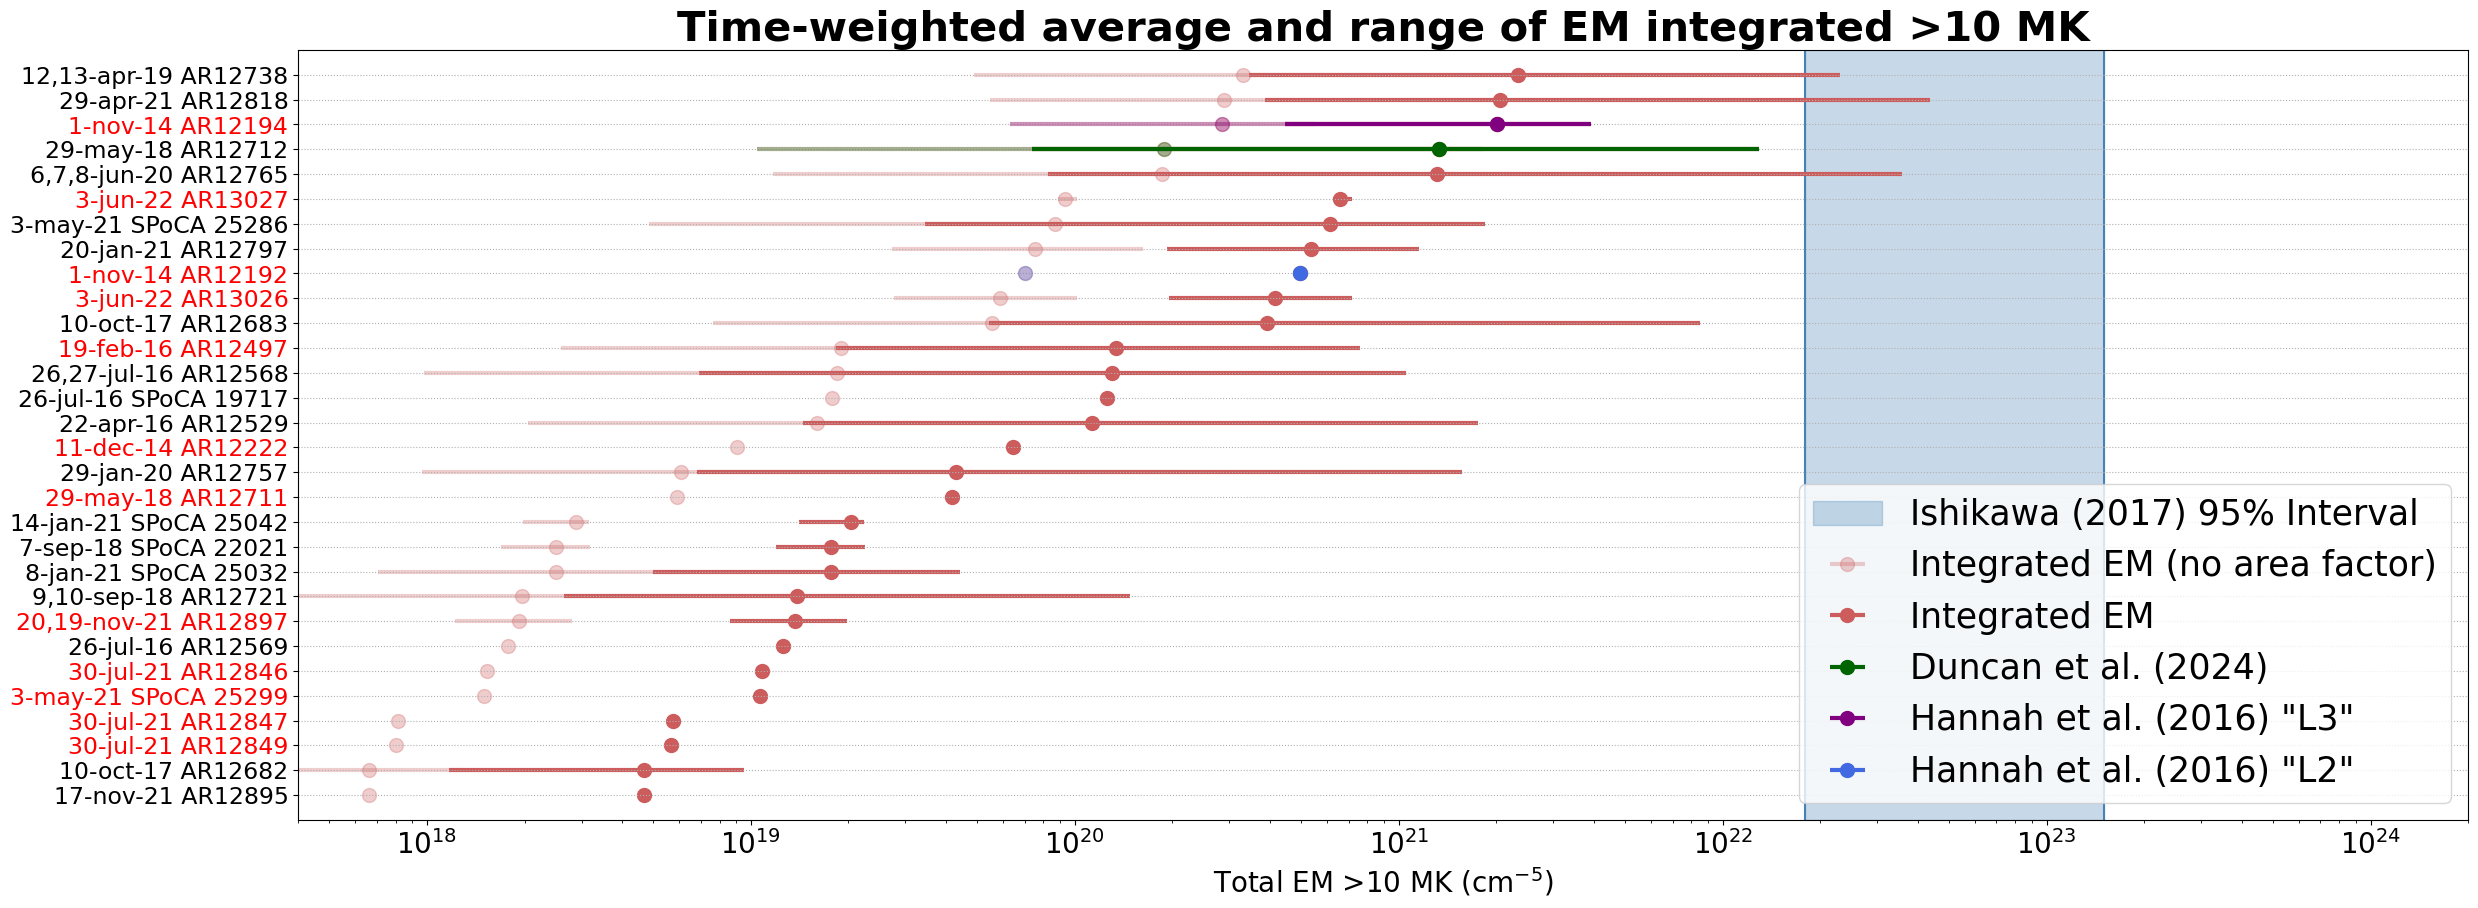

In [8]:
#Make EM > 10 MK plot

with open('/Users/jmdunca2/do-dem/reference_files/samesames.pickle', 'rb') as f:
    data = pickle.load(f)

samesames = data['same region lists']
grf = data['ghost ray flags']
filelist = get_same_region_file_lists(samesames, all_targets)


#Factor to adjust integrated EM values
area_i = 100**2
area_m = np.pi*150**2
#print(area_i, area_m)
factor = area_m/area_i
#factor=1


allgood=0
region_above10s=[]
region_totaltime=[]
for i in range(0, len(filelist)):
    gf = filelist[i]

    vals = []
    above10s_ = []
    totaltime = 0
    for f_ in gf:
        with open(f_, 'rb') as f:
            data = pickle.load(f)
        time = data['time_interval']
        dur = (time[1]-time[0]).to(u.s).value
        above10s = data['above_10MK']
        #print(f_)
        #print(above10s)
        above10s_.append(above10s[0])
        vals.append([dur*above10s[0]])
        totaltime+=dur

    #print(totaltime)
    if vals:
        region_above10s.append([np.sum(vals)/totaltime*factor, np.min(above10s_)*factor, np.max(above10s_)*factor])
        region_totaltime.append(totaltime)

    else:
        region_above10s.append([0, 0, 0])
        region_totaltime.append(0)
    

order = np.argsort(np.array(region_above10s)[:,0])
regids = [samesames[i] for i in order]
grf = [grf[i] for i in order]

ghost_ticks = np.where(grf)[0]

plotlabs = make_labels(regids)

#print('')
#print(len(labs))
#print(len(order))

region_time_hr = np.array((region_totaltime*u.s).to(u.hr))
#print(region_time_hr[order])


fig, ax = plt.subplots(1, 1, figsize=(28,10))


xerrl = (np.array(region_above10s)[:,0][order]/factor - np.array(region_above10s)[:,1][order]/factor)
xerrl[np.where(xerrl < 1e10)] = 0.0
xerrh = (np.array(region_above10s)[:,2][order]/factor - np.array(region_above10s)[:,0][order]/factor)
xerrh[np.where(xerrh < 1e10)] = 0.0

#xerr = [(np.array(region_above10s)[:,0][order] - np.array(region_above10s)[:,1][order]), 
#        (np.array(region_above10s)[:,2][order] - np.array(region_above10s)[:,0][order])]

xerr_nf = [xerrl, xerrh]

ax.errorbar(np.array(region_above10s)[:,0][order]/factor, np.arange(0, len(filelist), 1), 
            xerr=xerr_nf,
           linestyle='', marker='o', linewidth=3, markersize=10, color='indianred', 
            label='Integrated EM (no area factor)', alpha=0.3, zorder=0)

xerrl = (np.array(region_above10s)[:,0][order] - np.array(region_above10s)[:,1][order])
xerrl[np.where(xerrl < 1e10)] = 0.0
xerrh = (np.array(region_above10s)[:,2][order] - np.array(region_above10s)[:,0][order])
xerrh[np.where(xerrh < 1e10)] = 0.0

#xerr = [(np.array(region_above10s)[:,0][order] - np.array(region_above10s)[:,1][order]), 
#        (np.array(region_above10s)[:,2][order] - np.array(region_above10s)[:,0][order])]

xerr = [xerrl, xerrh]

ax.errorbar(np.array(region_above10s)[:,0][order], np.arange(0, len(filelist), 1), 
            xerr=xerr,
           linestyle='', marker='o', linewidth=3, markersize=10, color='indianred', label='Integrated EM', zorder=1)



oneerr = np.zeros((2,1))

ginds = [26, 27, 21]
colors = ['darkgreen', 'purple', 'royalblue']
labels = ['Duncan et al. (2024)', 'Hannah et al. (2016) "L3"', 'Hannah et al. (2016) "L2"']
gc=0
for gind in ginds:
    oneerr[0] = xerr[0][gind]
    oneerr[1] = xerr[1][gind]
    
    print(oneerr)
    
    ax.errorbar(np.array(region_above10s)[:,0][order][gind]/factor, np.arange(0, len(filelist), 1)[gind],
                xerr=oneerr/factor,
                linestyle='', marker='o', color=colors[gc], linewidth=3, markersize=10, alpha=0.3, zorder=2) #, s=140)
    
    
    ax.errorbar(np.array(region_above10s)[:,0][order][gind], np.arange(0, len(filelist), 1)[gind],
                xerr=oneerr,
                linestyle='', marker='o', color=colors[gc], linewidth=3, markersize=10, label=labels[gc], zorder=2) #, s=140)

    gc+=1



fntsz=25
ax.set_xscale('log')
ax.axvline(1.8e22, color='steelblue', zorder=0)
ax.axvline(1.5e23, color='steelblue', zorder=0)
ax.axvspan(1.8e22, 1.5e23, alpha=0.3, color='steelblue', label='Ishikawa (2017) 95% Interval', zorder=0)
ax.set_yticks(np.arange(0, len(filelist))) #[2:]
ax.set_yticklabels(labels=plotlabs, fontsize=17) #[2:]
plt.xticks(fontsize=20)
ax.set_xlabel('Total EM >10 MK ('+(u.cm**(-5)).to_string('latex_inline')+')', fontsize=20)
ax.grid(axis = 'y', linestyle='dotted')
ax.legend(loc='lower right', fontsize=fntsz)
ax.set_ylim([-1,len(filelist)])
ax.set_xlim([4e17,2e24])
ax.set_title('Time-weighted average and range of EM integrated >10 MK', fontsize=30, fontweight='bold')
for i in ghost_ticks:
    ax.get_yticklabels()[i].set_color('red')
print('')

plt.savefig('per_region_above10_new_postghost_postshut_goesinput_new2.png', dpi=300)

/Users/jmdunca2/do-dem/DEM_folders//initial_dem_7sep18//18-10-15_18-27-45/18-10-15_18-27-45_5.6_7.2_07-sep-18_MC_DEM_result.pickle
/Users/jmdunca2/do-dem/DEM_folders//initial_dem_7sep18//18-27-45_18-36-30/18-27-45_18-36-30_5.6_7.2_07-sep-18_MC_DEM_result.pickle


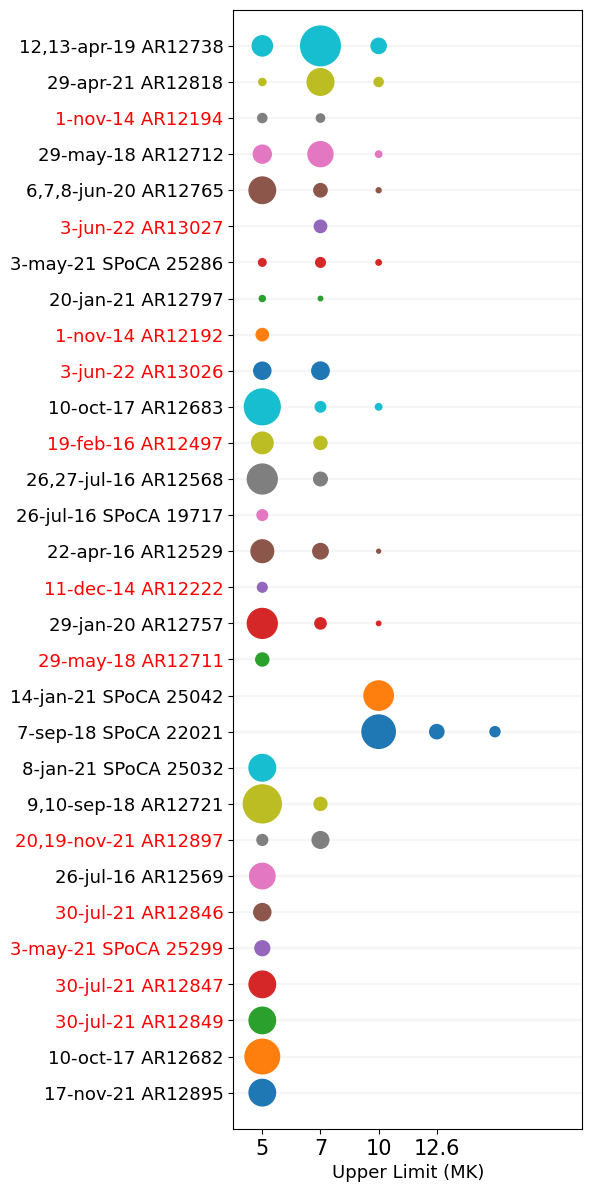

In [9]:
#Consistency plot

import glob
import os
import visualize_dem_results as viz

time_weighted = True
seconds_per = 1

tickfont=15

with open('/Users/jmdunca2/do-dem/reference_files/samesames.pickle', 'rb') as f:
    data = pickle.load(f)

samesames = data['same region lists']
filelist = get_same_region_file_lists(samesames, all_targets)

all_sumcons = []
for i in range(0, len(samesames)):
    key = samesames[i][0].split(' ')[0]
    sumcons_tw=[]
    for ff in filelist[i]:
        files = glob.glob(os.path.dirname(ff)+'/*'+key+'_MC_DEM_result.pickle')
        if len(samesames[i]) > 1:
            #print(samesames[i])
            key2 = samesames[i][1].split(' ')[0]
            files.extend(glob.glob(os.path.dirname(ff)+'/*'+key2+'_MC_DEM_result.pickle'))
                         
        files.sort()
        sumcon = 0.5
        for f in files:
            data, timestring, time = viz.load_DEM(f)
        
            sumcon += (1 if viz.checkresid(data) == 0 else 0)
        if time_weighted:
            dur = (time[1]-time[0]).to(u.s)
            time_mult = round(dur.value/seconds_per)
            sumcons_tw.extend([sumcon for i in range(0,time_mult)])
        if sumcon > 2.5:
            print(files[-1])
                

    all_sumcons.append(sumcons_tw)
    if not sumcons_tw:
        print('NO FILES FOR: ', samesames[i])



regids = [samesames[i] for i in order]
sumcons_order = [all_sumcons[i] for i in order]



fig, axes = plt.subplots(1, 1, figsize=(6,12), tight_layout = {'pad': 1})

yvs=[]
for i in range(0, len(regids)):
    sizes = np.histogram(sumcons_order[i], bins=[0.5,1.5,2.5,3.5, 4.5, 5.5, 6.5])[0]/10.
    yvs.append(i)
    axes.scatter(np.array([0.5,1.5,2.5,3.5, 4.5, 5.5])+0.5, np.zeros(6)+(i), s=sizes, zorder=3)
    axes.axhline(i, color='whitesmoke')


axes.set_xticks([1,2,3,4], ['5', '7', '10', '12.6'], fontsize=tickfont)
axes.set_xlabel('Upper Limit (MK)', fontsize=13)
axes.set_xlim([0.5,6.5])
    
axes.set_yticks(yvs)
axes.set_yticklabels(labels=plotlabs, fontsize=13)
axes.set_ylim([-1,30])
for i in ghost_ticks:
    axes.get_yticklabels()[i].set_color('red')

plt.savefig('consistency_bubbles_postghost_postshut_new2.png', dpi=300)


# fig, axes = plt.subplots(len(regids[2:])+1, 1, figsize=(4,(len(regids[2:])+1)), sharex=True)

# for i in range(0, len(regids[2:])):
#     ax=axes[i]
#     ax.hist(sumcons_order[2:][i], bins=[0.5,1.5,2.5,3.5, 4.5, 5.5], edgecolor='black', color='palevioletred')
#     #ax.set_ylabel(ylabel)   
#     ax.set_xlim([0, 6.5])
#     ax.set_ylim([1, 1e5])
#     ax.set_yscale('log')
#     ax.text(3, 2e4, labs[2:][i], fontweight='bold')
#     #ax.set_xlabel('Upper Limit (MK)', fontsize=15)

# ax=axes[-1]
# ax.set_xticks([1,2,3,4], ['5', '7', '10', '12.6'], fontsize=tickfont)

# fig.subplots_adjust(hspace=0)

In [9]:
#Consistency plot - new two-panel format

import glob
import os
import visualize_dem_results as viz

time_weighted = True
seconds_per = 1

tickfont=15

with open('/Users/jmdunca2/do-dem/reference_files/samesames.pickle', 'rb') as f:
    data = pickle.load(f)

#get file lists for each region
samesames = data['same region lists']
grf = data['ghost ray flags']
filelist = get_same_region_file_lists(samesames, all_targets)

all_durs = []
totals = []
above_material = []
for i in range(0, len(samesames)):
    key = samesames[i][0].split(' ')[0]
    sumcons_tw=[]
    dur_each=np.zeros(5)*u.s
    a5w7s, a7w10s, a5w10s, a10w12s, a12w15s = [], [], [], [], []
    #for each completed DEM in the list...
    for ff in filelist[i]:
        #Get the consistency files (DEM results with different temp bounds)
        files = glob.glob(os.path.dirname(ff)+'/*'+key+'_MC_DEM_result.pickle')
        #If there are multiple keys, need a second form to make sure we get 
        #the consistency files (DEM results with different temp bounds)
        if len(samesames[i]) > 1:
            #print(samesames[i])
            key2 = samesames[i][1].split(' ')[0]
            files.extend(glob.glob(os.path.dirname(ff)+'/*'+key2+'_MC_DEM_result.pickle'))

        #Sort by temp bounds
        files.sort()
        sumcon=0
        
        #get the sum of the consistency values over all files for this result
        for f in files:
            data, timestring, time = viz.load_DEM(f)
            #if data['chisq'] > 2.5:
                #print('chisq: ', data['chisq'], key, timestring, f)
            sumcon += (1 if viz.checkresid(data) == 0 else 0)

        #get the time interval duation, add to total duration for that consistency sum
        dur = (time[1]-time[0]).to(u.s)
        dur_each[sumcon]+=dur

        #If material above 5 MK is needed:
        if sumcon > 0:
            #print(files[1])
            #Get above 5 MK material needed for DEM with 7 MK upper bound
            a5w7s.append(np.array(viz.get_DEM_params(files[1])[2]))
            if sumcon > 1:
                #Get above 7 MK material needed for DEM with 10 MK upper bound
                a7w10s.append(np.array(viz.get_DEM_params(files[2])[3]))
                a5w10s.append(np.array(viz.get_DEM_params(files[2])[2]))
            if sumcon > 2:
                #Get above 10 MK material needed for DEM with 12.6 MK upper bound
                a10w12s.append(np.array(viz.get_DEM_params(files[3])[4]))
            if sumcon > 3:
                #Get above 12.6 MK material needed for DEM with 15.8 MK upper bound
                print(files[4])
                print(viz.get_DEM_params(files[4]))
                print(viz.get_DEM_params(files[4])[-1])
                a12w15s.append(np.array(viz.get_DEM_params(files[4])[-1]))

        
    above_material.append([np.array(a5w7s), np.array(a7w10s), np.array(a5w10s), np.array(a10w12s), np.array(a12w15s)])
    total=np.sum(dur_each)
    all_durs.append(dur_each/total)
    totals.append(total)


consorder = np.argsort(np.array(all_durs)[:,0])
consorder[0:3] = [12, 18, 29]
print('WARNING MANUAL EDIT OF CONSISTENCY ORDER FOR NICE PLOTTING!!!')

above_material = [above_material[i] for i in consorder]
regids = [samesames[i] for i in consorder]
durs_order = [all_durs[i] for i in consorder]
plotlabs = make_labels(regids)
grf2 = [grf[i] for i in consorder]


ghost_ticks = np.where(grf2)[0]

# res_dict = {}
# for i in range(0, len(regids)):
#     res_dict[plotlabs[i]] = durs_order[i]

# category_names = ['5 MK', '7 MK', '10 MK', '12.6 MK', '15.8 MK']
# results=res_dict


/Users/jmdunca2/do-dem/DEM_folders//initial_dem_7sep18//18-27-45_18-36-30/18-27-45_18-36-30_5.6_7.2_07-sep-18_MC_DEM_result.pickle
(6.206496684293538, 2.1946045083434498e+26, [1.2986345251986125e+19, 9.223066890793994e+17, 2.3569210454639716e+20], [7.356050908008883e+18, 1.9088125194053606e+17, 4.439859390642982e+19], [1.8546051738043103e+18, 4.2396732290914744e+16, 9.336255434786015e+18], 2.075412352091751e+25, 2.7781968342425708e+25, 2.3014342620202038e+24, 4.783179282253314e+25, ['A94', 'A131', 'A171', 'A193', 'A211', 'A335', '2.5-3.5keV A+B', '3.5-6.0keV A+B', '6.0-10.0keV A+B'], [0.9512819358208472, 6.24121518600999, 137.2109660082191, 306.1818121603973, 119.67608359850124, 5.432840882309148, 37.95104856268422, 0.8580463441017117, 0.04509037538296231], [0.9080186367755836, 1.9333795608555644, 16.309222598345126, 32.9550494725159, 13.41569436201099, 1.246155423250782, 7.612721377679211, 0.19281801749719463, 0.022089682399761862], [(2.4093860942782137, 0.7077560390977213, 11.0956556

['7-sep-18 SPoCA 22021', '14-jan-21 SPoCA 25042', '3-jun-22 AR13027', '29-apr-21 AR12818', '12,13-apr-19 AR12738', '20,19-nov-21 AR12897', '3-may-21 SPoCA 25286', '29-may-18 AR12712', '3-jun-22 AR13026', '1-nov-14 AR12194', '20-jan-21 AR12797', '22-apr-16 AR12529', '19-feb-16 AR12497', '6,7,8-jun-20 AR12765', '26,27-jul-16 AR12568', '29-jan-20 AR12757', '10-oct-17 AR12683', '9,10-sep-18 AR12721', '29-may-18 AR12711', '10-oct-17 AR12682', '11-dec-14 AR12222', '1-nov-14 AR12192', '26-jul-16 SPoCA 19717', '3-may-21 SPoCA 25299', '30-jul-21 AR12847', '30-jul-21 AR12849', '30-jul-21 AR12846', '17-nov-21 AR12895', '26-jul-16 AR12569', '8-jan-21 SPoCA 25032']



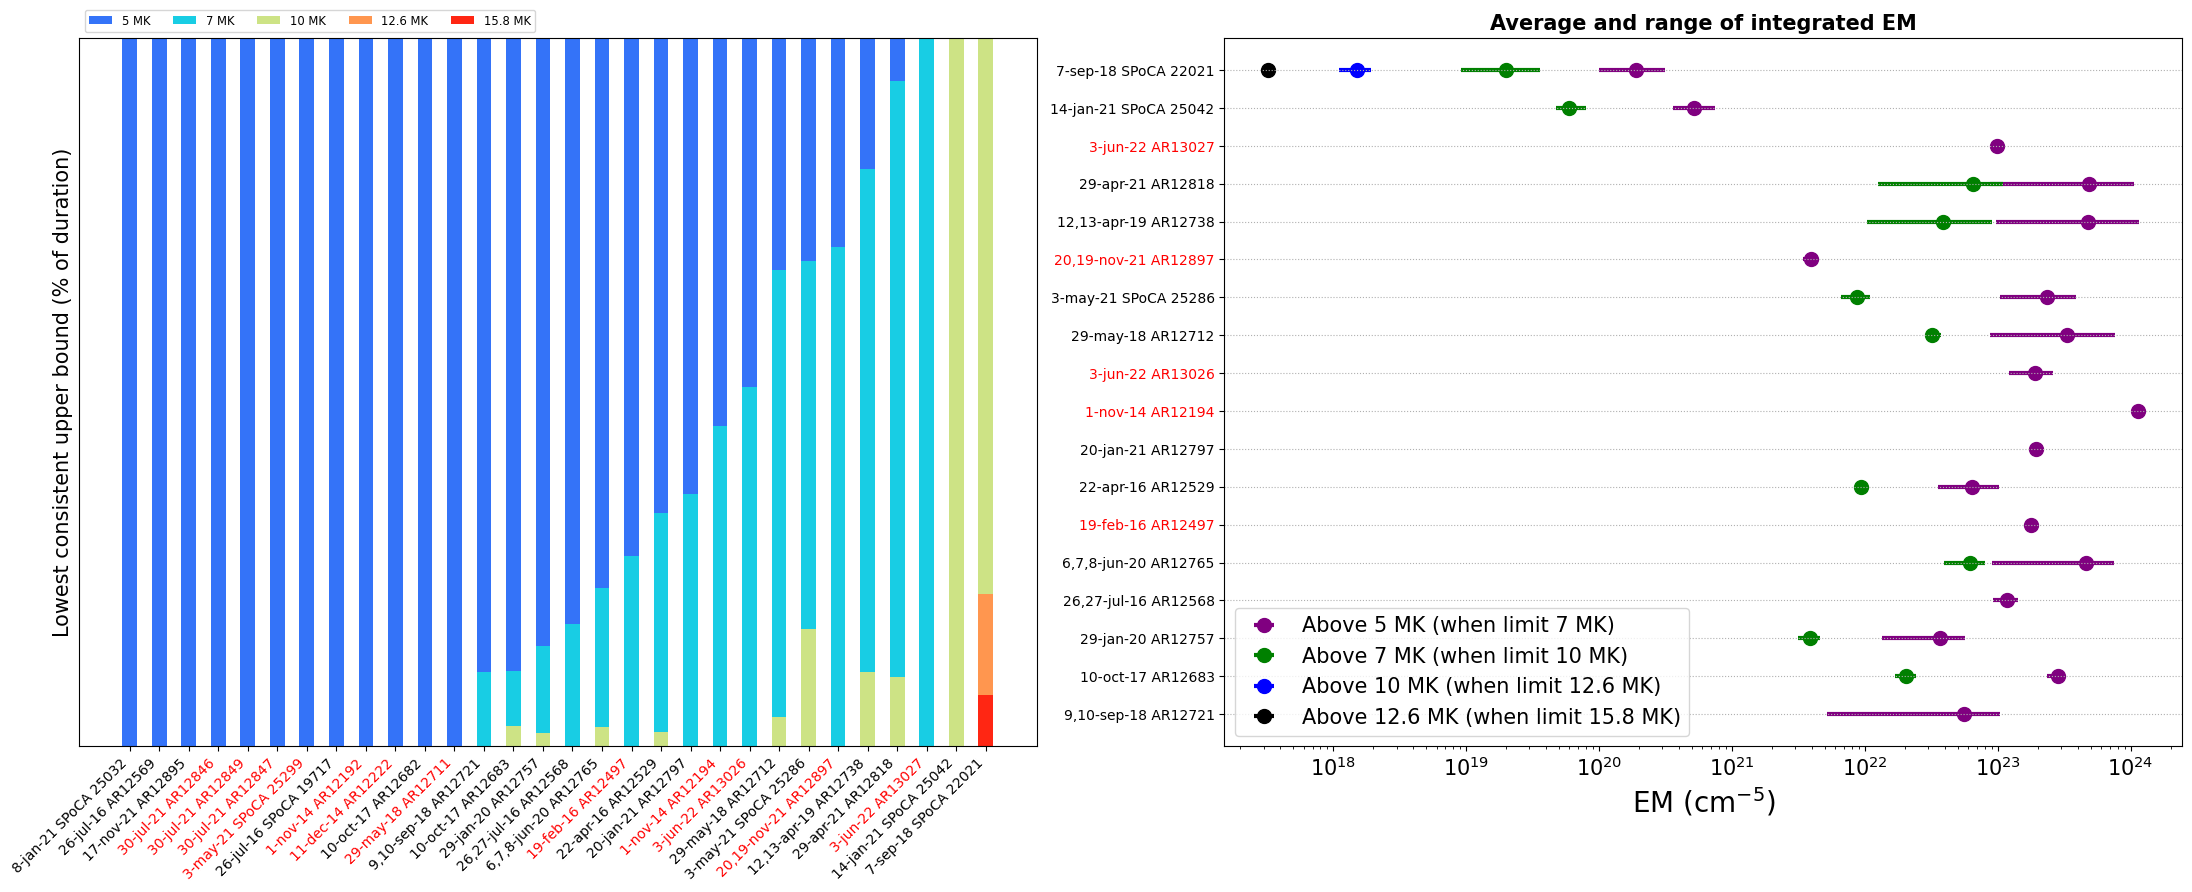

In [21]:



"""
https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
adapted from ^
"""
labels = plotlabs #list(results.keys())
data = np.array(durs_order) #np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['rainbow']([0.15  , 0.3, 0.65, 0.8, 0.95 ])#[0.8  , 0.6, 0.4, 0.2, 0.05 ])
    #np.linspace(0.8, 0.15, data.shape[1]))
category_names = ['5 MK', '7 MK', '10 MK', '12.6 MK', '15.8 MK']

fig, axes = plt.subplots(1,2, figsize=(22, 9), tight_layout = {'pad': 1})

ax=axes[0]
ax.invert_yaxis()
#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlim(0, np.sum(data, axis=1).max())

print(labels)


for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.bar(np.arange(len(labels), 0, -1),#labels, 
                   widths, bottom=starts, width=0.5, #tick_label=plotlabs, 
                   #left=starts, #height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    #ax.bar_label(rects, label_type='center', color=text_color)

ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')
#ax.set_ylim([-(len(regids)-len(abovelabs)),len(abovelabs)+1])
#ax.tick_params(axis='x', labelrotation=45, ha='right')
ax.set_xticks(np.arange(len(labels), 0, -1))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Lowest consistent upper bound (% of duration)', fontsize=15)
ax.set_yticks([])
for i in ghost_ticks:
    indi = np.arange(len(labels)-1, 0, -1)[i]
    #print(i, indi)
    ax.get_xticklabels()[i].set_color('red')

region_a5w7s = []
region_a7w10s = []
region_a5w10s = []
region_a10w12s = []
region_a12w15s = []
abovelabs = []
for i in range(0,len(regids)):
    
    if np.sum(durs_order[i][1:]) > 0:
        abovelabs.append(plotlabs[i])
        a5w7s = above_material[i][0]
        region_a5w7s.append([np.mean(a5w7s, axis=0)[0], np.min(a5w7s, axis=0)[0], np.max(a5w7s, axis=0)[0]])
        a7w10s = above_material[i][1]
        a5w10s = above_material[i][2]
        a10w12s = above_material[i][3]
        a12w15s = above_material[i][4]
        if len(a7w10s) == 0:
            region_a7w10s.append([0,0,0])
            region_a5w10s.append([0,0,0])
        else:
            region_a7w10s.append([np.mean(a7w10s, axis=0)[0], np.min(a7w10s, axis=0)[0], np.max(a7w10s, axis=0)[0]])
            region_a5w10s.append([np.mean(a5w10s, axis=0)[0], np.min(a5w10s, axis=0)[0], np.max(a5w10s, axis=0)[0]])
        if len(a10w12s) == 0:
            region_a10w12s.append([0,0,0])
        else:
            region_a10w12s.append([np.mean(a10w12s, axis=0)[0], np.min(a10w12s, axis=0)[0], np.max(a10w12s, axis=0)[0]])
        if len(a12w15s) == 0:
            region_a12w15s.append([0,0,0])
        else:
            if len(a12w15s) > 1:
                region_a12w15s.append([np.mean(a12w15s, axis=0)[0], np.min(a12w15s, axis=0)[0], np.max(a12w15s, axis=0)[0]])
            else:
                region_a12w15s.append([a12w15s[0][0], a12w15s[0][0], a12w15s[0][0]])
ax=axes[1]


alabs = ['Above 5 MK (when limit 7 MK)', 'Above 7 MK (when limit 10 MK)', 'Above 10 MK (when limit 12.6 MK)', 
        'Above 12.6 MK (when limit 15.8 MK)']
ras = [region_a5w7s, region_a7w10s, region_a10w12s, region_a12w15s]
acolor = ['purple', 'green', 'blue', 'black']
for i in range(0, len(alabs)):
    xerrl = (np.array(ras[i])[:,0]- np.array(ras[i])[:,1])
    xerrh = (np.array(ras[i])[:,2]- np.array(ras[i])[:,0])
    xerr = [xerrl, xerrh]

    ax.errorbar(np.array(ras[i])[:,0], np.arange(len(abovelabs), 0, -1), 
                xerr=xerr,
               linestyle='', marker='o', linewidth=3, markersize=10, color=acolor[i], 
                label=alabs[i], alpha=1, zorder=0) 


# # xerrl = (np.array(region_a5w10s)[:,0]- np.array(region_a5w10s)[:,1])
# # xerrh = (np.array(region_a5w10s)[:,2]- np.array(region_a5w10s)[:,0])
# # xerr = [xerrl, xerrh]

# # ax.errorbar(np.array(region_a5w10s)[:,0], np.arange(len(abovelabs), 0, -1), 
# #             xerr=xerr,
# #            linestyle='', marker='o', linewidth=3, markersize=10, color='purple', 
# #             label='Above 5 MK (when limit 10 MK)', alpha=0.5, zorder=0) 

# xerrl = (np.array(region_a7w10s)[:,0]- np.array(region_a7w10s)[:,1])
# xerrh = (np.array(region_a7w10s)[:,2]- np.array(region_a7w10s)[:,0])
# xerr = [xerrl, xerrh]

# ax.errorbar(np.array(region_a7w10s)[:,0], np.arange(len(abovelabs), 0, -1), 
#             xerr=xerr,
#            linestyle='', marker='o', linewidth=3, markersize=10, color='green', 
#             label='Above 7 MK (when limit 10 MK)', alpha=1, zorder=0)  


# xerrl = (np.array(region_a10w12s)[:,0]- np.array(region_a10w12s)[:,1])
# xerrh = (np.array(region_a10w12s)[:,2]- np.array(region_a10w12s)[:,0])
# xerr = [xerrl, xerrh]

# ax.errorbar(np.array(region_a7w10s)[:,0], np.arange(len(abovelabs), 0, -1), 
#             xerr=xerr,
#            linestyle='', marker='o', linewidth=3, markersize=10, color='green', 
#             label='Above 7 MK (when limit 10 MK)', alpha=1, zorder=0)  


fntsz=15
ax.set_xscale('log')
ax.set_yticks(np.arange(len(abovelabs), 0, -1)) #[2:]
ax.set_yticklabels(labels=abovelabs, fontsize=10) #[2:]
#HARD CODED TO THE NUMBER OF GHOST RAY INTERVALS THAT HAVE >5MK CONSISTENCY INTERVALS (5):
for i in ghost_ticks[0:5]:
    indi = np.arange(len(abovelabs), 0, -1)[i]
    #print(i, indi)
    ax.get_yticklabels()[i].set_color('red')

plt.xticks(fontsize=15)
ax.set_xlabel('EM ('+(u.cm**(-5)).to_string('latex_inline')+')', fontsize=20)
ax.grid(axis = 'y', linestyle='dotted')
ax.legend(fontsize=fntsz)
#ax.set_ylim([-(len(regids)-len(abovelabs)),len(abovelabs)+1])
#ax.set_xlim([1e20,2e24])
ax.set_title('Average and range of integrated EM', fontsize=15, fontweight='bold')
#for i in ghost_ticks:
#    ax.get_yticklabels()[i].set_color('red')
print('')


plt.savefig('new_consistency_new2.png', dpi=300)

In [17]:
a12w15s

[]

In [15]:
region_a12w15s

[[array([3.23521010e+17, 5.95695362e+15, 2.30538054e+18]),
  array([3.23521010e+17, 5.95695362e+15, 2.30538054e+18]),
  array([3.23521010e+17, 5.95695362e+15, 2.30538054e+18])],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

In [16]:
region_a10w12s

[[1.5124588097449853e+18, 1.0988133349277037e+18, 1.9261042845622671e+18],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

In [29]:
print(len(labels), len(ghost_ticks))
ghost_ticks

30 12


array([ 0,  5,  8,  9, 12, 18, 20, 21, 23, 24, 25, 26])

New round of plots – exploring shape of DEM

- peak temperature (T) vs. amount of material above 10 MK
- peak EM vs. amount of EM above 10 MK
- peak temperature (T) vs. peak EM
- peak temperature, EM vs. AR age

Giant corner plot!

/var/folders/55/06y21cm93w70z_8gl7yxv2t40000gq/T/ipykernel_7388/3332846470.py:145: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bg_color_rgba = plt.cm.get_cmap(cmap)(norm(rho))


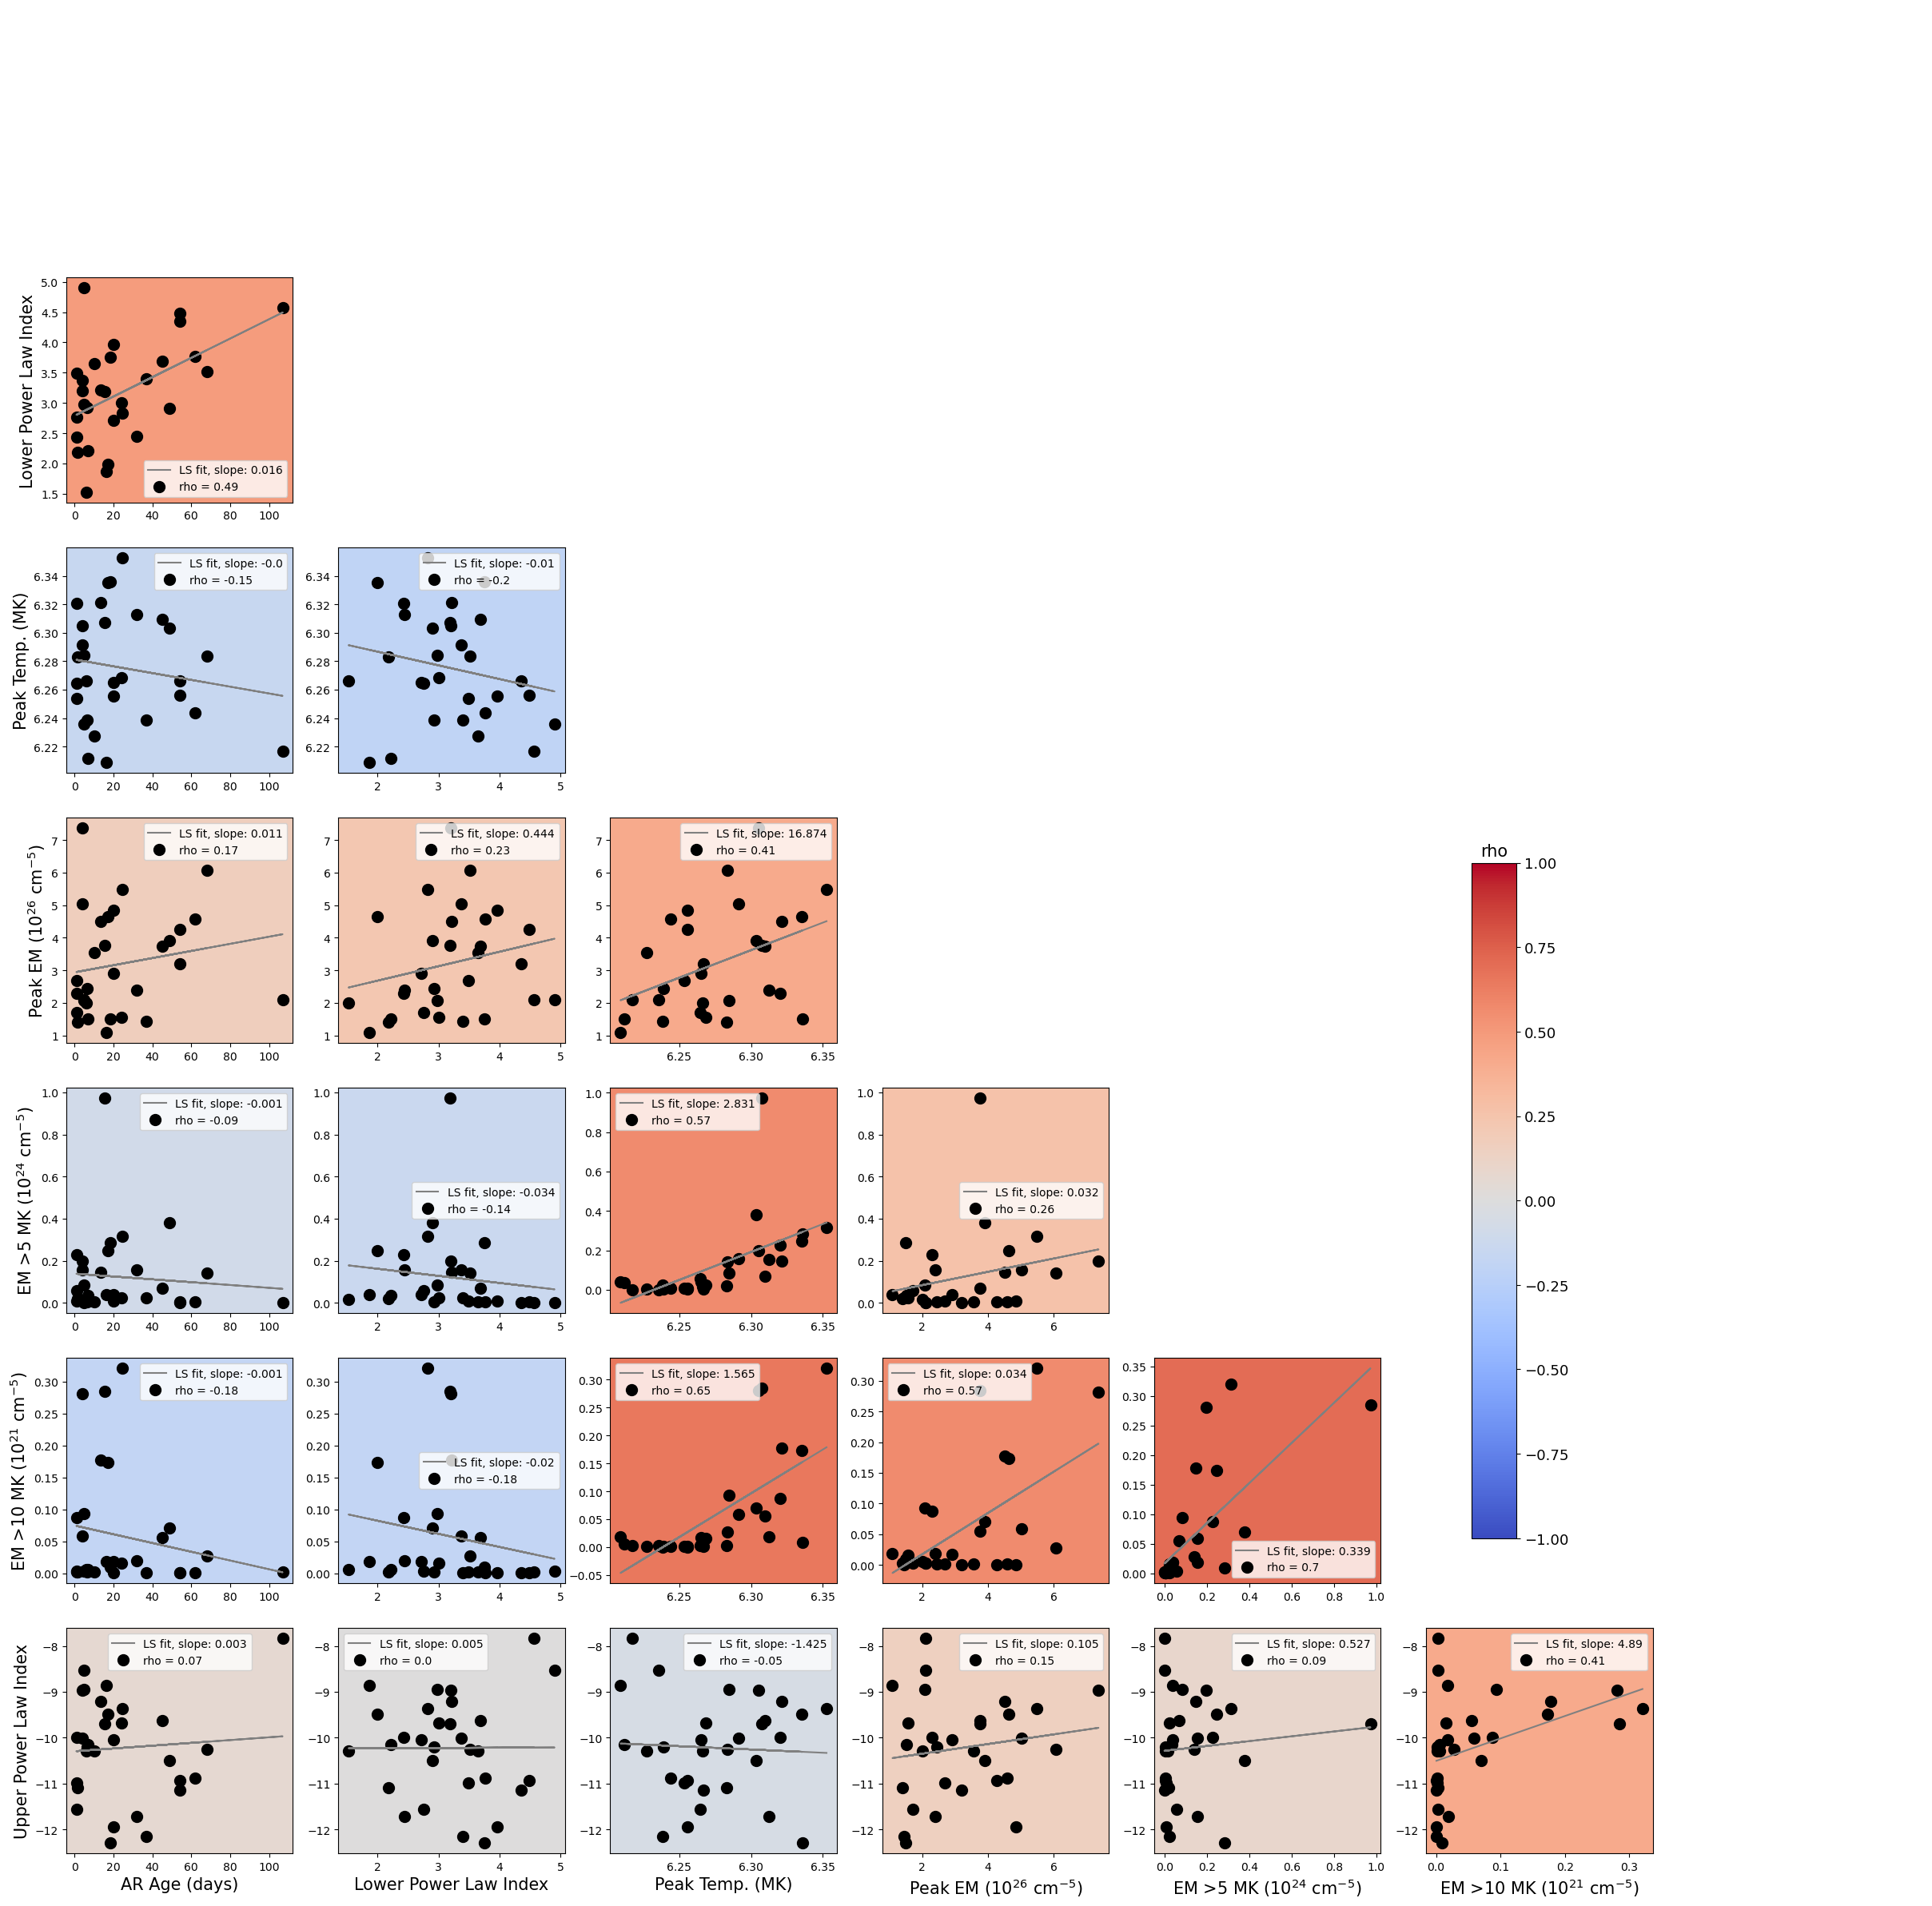

In [38]:
#Make EM > 10 MK plot

with open('/Users/jmdunca2/do-dem/reference_files/samesames.pickle', 'rb') as f:
    data = pickle.load(f)

samesames = data['same region lists']
filelist, agelist = get_same_region_file_lists(samesames, all_targets, get_agelists=True, noxrt=True)
#print(agelist)


def make_cornerplot(filelist, agelist, title=''):

    ages=[]
    for aa in agelist:
        all=[]
        for age in aa:
            all.append(age[0])
        ages.append(np.mean(np.array(all)))
        
    #print(len(agelist))
    
    #Factor to adjust integrated EM values
    area_i = 100**2
    area_m = np.pi*150**2
    #print(area_i, area_m)
    factor = area_m/area_i
    factor=1
    
    
    allgood=0
    region_above10s=[]
    region_above7s=[]
    region_above5s=[]
    region_totaltime=[]
    
    region_peakTs=[]
    region_peakEMs=[]
    
    region_lower=[]
    region_upper=[]
    
    for i in range(0, len(filelist)):
        gf = filelist[i]
    
        vals = []
        above10s_ = []
        val7s = []
        above7s_ = []
        val5s = []
        above5s_ = []
        totaltime = 0
        peakTs = []
        peakEM = []
        lowp = []
        upp = []
        for f_ in gf:
            with open(f_, 'rb') as f:
                data = pickle.load(f)
            time = data['time_interval']
            dur = (time[1]-time[0]).to(u.s).value
            above10s = data['above_10MK']
            above7s = data['above_7MK']
            above5s = data['above_5MK']
            #print(data.keys())
            peakTs.append(data['max_temp'])
            peakEM.append(data['max'])
            lowp.append(data['powerlaws2'][0][0])
            upp.append(data['powerlaws2'][1][0])
            above10s_.append(above10s[0])
            vals.append([dur*above10s[0]])
            above7s_.append(above7s[0])
            val7s.append([dur*above7s[0]])
            above5s_.append(above5s[0])
            val5s.append([dur*above5s[0]])
            totaltime+=dur

        #print('val comp: ', np.std(above10s_), np.sum(vals)/totaltime*factor, np.mean(above10s_))
        #print(len(vals))
    
        #print(totaltime)
        if vals:
            region_above10s.append([np.sum(vals)/totaltime*factor, np.min(above10s_)*factor, np.max(above10s_)*factor])
            region_above7s.append([np.sum(val7s)/totaltime*factor, np.min(above7s_)*factor, np.max(above7s_)*factor])
            region_above5s.append([np.sum(val5s)/totaltime*factor, np.min(above5s_)*factor, np.max(above5s_)*factor])
            region_totaltime.append(totaltime)
            region_peakTs.append(np.mean(peakTs))
            region_peakEMs.append(np.mean(peakEM))
            region_lower.append(np.mean(lowp))
            region_upper.append(np.mean(upp))
        else:
            region_above10s.append([0, 0, 0])
            region_above7s.append([0, 0, 0])
            region_above5s.append([0, 0, 0])
            region_totaltime.append(0)
            region_peakTs.append(0)
            region_peakEMs.append(0)    
            region_lower.append(0)
            region_upper.append(0)
    
    #print(samesames[np.where(np.array(region_above5s) > 0.5e24)[0][0]])
    #for i in range(0, len(np.where(np.array(region_peakTs) < 1)[0])):
    #    print(samesames[np.where(np.array(region_peakTs) < 1)[0][i]])
    
    
    
    order = np.argsort(np.array(region_above10s)[:,0])
    
    above10s_vals_inorder = np.array(region_above10s)[:,0][order]/1e21
    above7s_vals_inorder = np.array(region_above7s)[:,0][order]/1e23
    above5s_vals_inorder = np.array(region_above5s)[:,0][order]/1e24
    peakTs_inorder = np.array(region_peakTs)[order]
    peakEMs_inorder = np.array(region_peakEMs)[order]/1e26
    lower_inorder = np.array(region_lower)[order]
    upper_inorder = np.array(region_upper)[order]
    
    ages_inorder = np.array(ages)[order]
    
    params=[ages_inorder,
            lower_inorder, peakTs_inorder, peakEMs_inorder, 
            above5s_vals_inorder, 
            #above7s_vals_inorder, 
            above10s_vals_inorder, 
            upper_inorder]
    
    plabels=['AR Age (days)',
             'Lower Power Law Index', 'Peak Temp. (MK)', 
             r'Peak EM ($10^{26}$ '+(u.cm**(-5)).to_string('latex_inline')+')',
             r'EM >5 MK ($10^{24}$ '+(u.cm**(-5)).to_string('latex_inline')+')',
             #r'EM >7 MK ($10^{23}$ '+(u.cm**(-5)).to_string('latex_inline')+')', 
             r'EM >10 MK ($10^{21}$ '+(u.cm**(-5)).to_string('latex_inline')+')',
            'Upper Power Law Index']
    
    
    fig, axes = plt.subplots(len(plabels), len(plabels), figsize=(30,30))
    from matplotlib.colors import TwoSlopeNorm
    from matplotlib import cm
    cmap = 'coolwarm'
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    for i in range(0, len(plabels)):
        for j in range(0, len(plabels)):
            ax = axes[j,i]
            if j > i:
                rho=round(np.corrcoef(params[i], params[j])[0,1],2)
    
                bg_color_rgba = plt.cm.get_cmap(cmap)(norm(rho))
                
                # Set the background color (facecolor) of the subplot axis
                ax.set_facecolor(bg_color_rgba)
            
        
                ax.errorbar(params[i], params[j], 
                            #xerr=xerr,
                           linestyle='', marker='o', linewidth=3, markersize=10, color='black', 
                            label='rho = '+str(rho), zorder=0)
        
        
                #Fit option with y weights only
                m, b = np.polyfit(params[i], params[j], 1)
                fity = np.array(params[i])*m + b
                ax.plot(params[i], fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  
                if i==0:
                    ax.set_ylabel(plabels[j], fontsize=15)
                if j==len(plabels)-1:
                    ax.set_xlabel(plabels[i], fontsize=15)
    
                ax.legend()
    
            else:
                ax.set_axis_off()
    
            if [i, j] == [len(plabels)-2,len(plabels)-3]:
                cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, fraction=0.8, shrink=3, aspect=15)
                cbar.ax.tick_params(labelsize=13)
                cbar.ax.set_title('rho', fontsize=15)
                
    
    
    plt.savefig('makeshift_corner_5_10only_'+title+'.png', dpi=300)


make_cornerplot(filelist, agelist, title='noxrt_new2')

^Have just got to the point of extracting arrays of ages. Need to make a sensible average age for each region, and then include an Age parameter in the corner plots.

/Users/jmdunca2/do-dem//dodem/HARP_and_age.py:792: RuntimeWarning: invalid value encountered in scalar divide
  


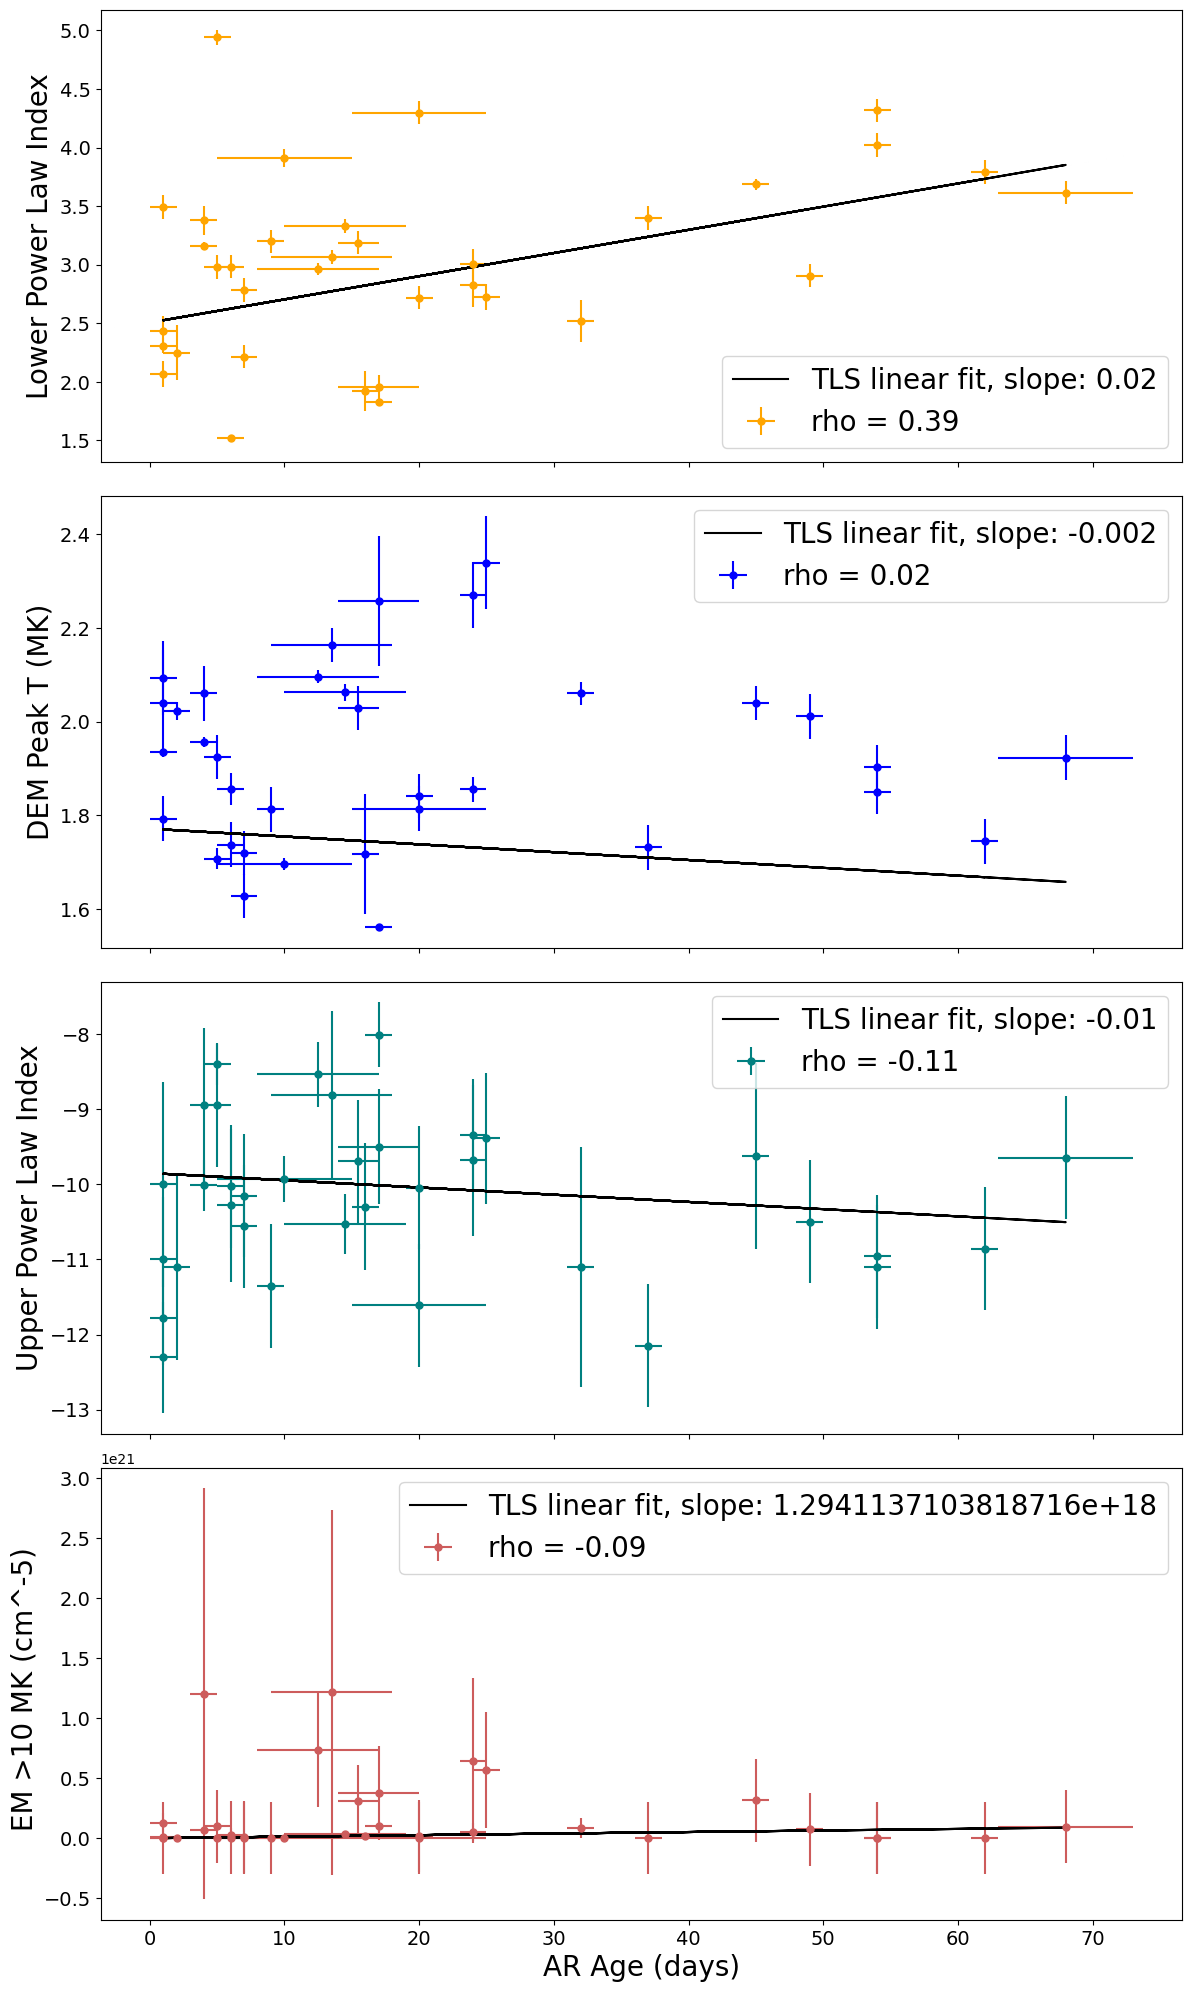

In [243]:
#MEGAPLOT - AREA NORMALIZED
importlib.reload(haa)

from scipy import odr

#ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

def f(B, x):
    #Linear function
    return B[0]*x + B[1]
    
linear = odr.Model(f)

params = ['lowerpower2', 'peak', 'upperpower2', 'above10']
paramlabels = ['Lower Power Law Index', 'DEM Peak T (MK)', 'Upper Power Law Index', ' EM >10 MK (cm^-5)']#' Log EM >10 MK (cm^-5)']
tcolors = ['orange', 'blue', 'teal', 'indianred']
skh = [False, False, False, False]


labelsize=20

fig, axes = plt.subplots(len(params),1, figsize=(12, 5*len(params)), tight_layout = {'pad': 1}, sharex='col')

for i in range(0, len(params)):

    dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                skiphuh=skh[i])

    yerr_ = stdvs
    wwy = [1/y for y in yerr_]
    

    #Plot vs. age
    ax=axes[i]



    herr = ages[:,0]-ages[:,1]
    wwx = [1/y for y in herr]

    #[print(s) if (s not in sks) else print('') for s in regions]

    rho=round(np.corrcoef(ages[:,0], dataparam[:,0])[0,1],2)
    ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=herr, 
                linestyle='none', marker='o', markersize=5, label='rho = '+str(rho))

    # #Fit option with y weights only
    # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=wwy)
    # fity = np.array(ages[:,0])*m + b
    # ax.plot(ages[:,0], fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  

    #Fit option with both weights
    mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
    myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
    myoutput = myodr.run()
    #myoutput.pprint()
    m, b = myoutput.beta
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, label='TLS linear fit, slope: '+str(round(m,3)), color='black')


    if i==len(params)-1:
        ax.set_xlabel('AR Age (days)', fontsize=labelsize)
    ax.set_ylabel(paramlabels[i], fontsize=labelsize)
    ax.legend(fontsize=labelsize)
    ax.tick_params(axis='both', which='major', labelsize=14) 


plt.savefig('all_DEM_params_vs_age_postacc_2_nov14.png')

['01-nov-14_1 region_1']


/var/folders/55/06y21cm93w70z_8gl7yxv2t40000gq/T/ipykernel_14088/300120248.py:142: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bg_color_rgba = plt.cm.get_cmap(cmap)(norm(rho))


['01-nov-14_1 region_0']


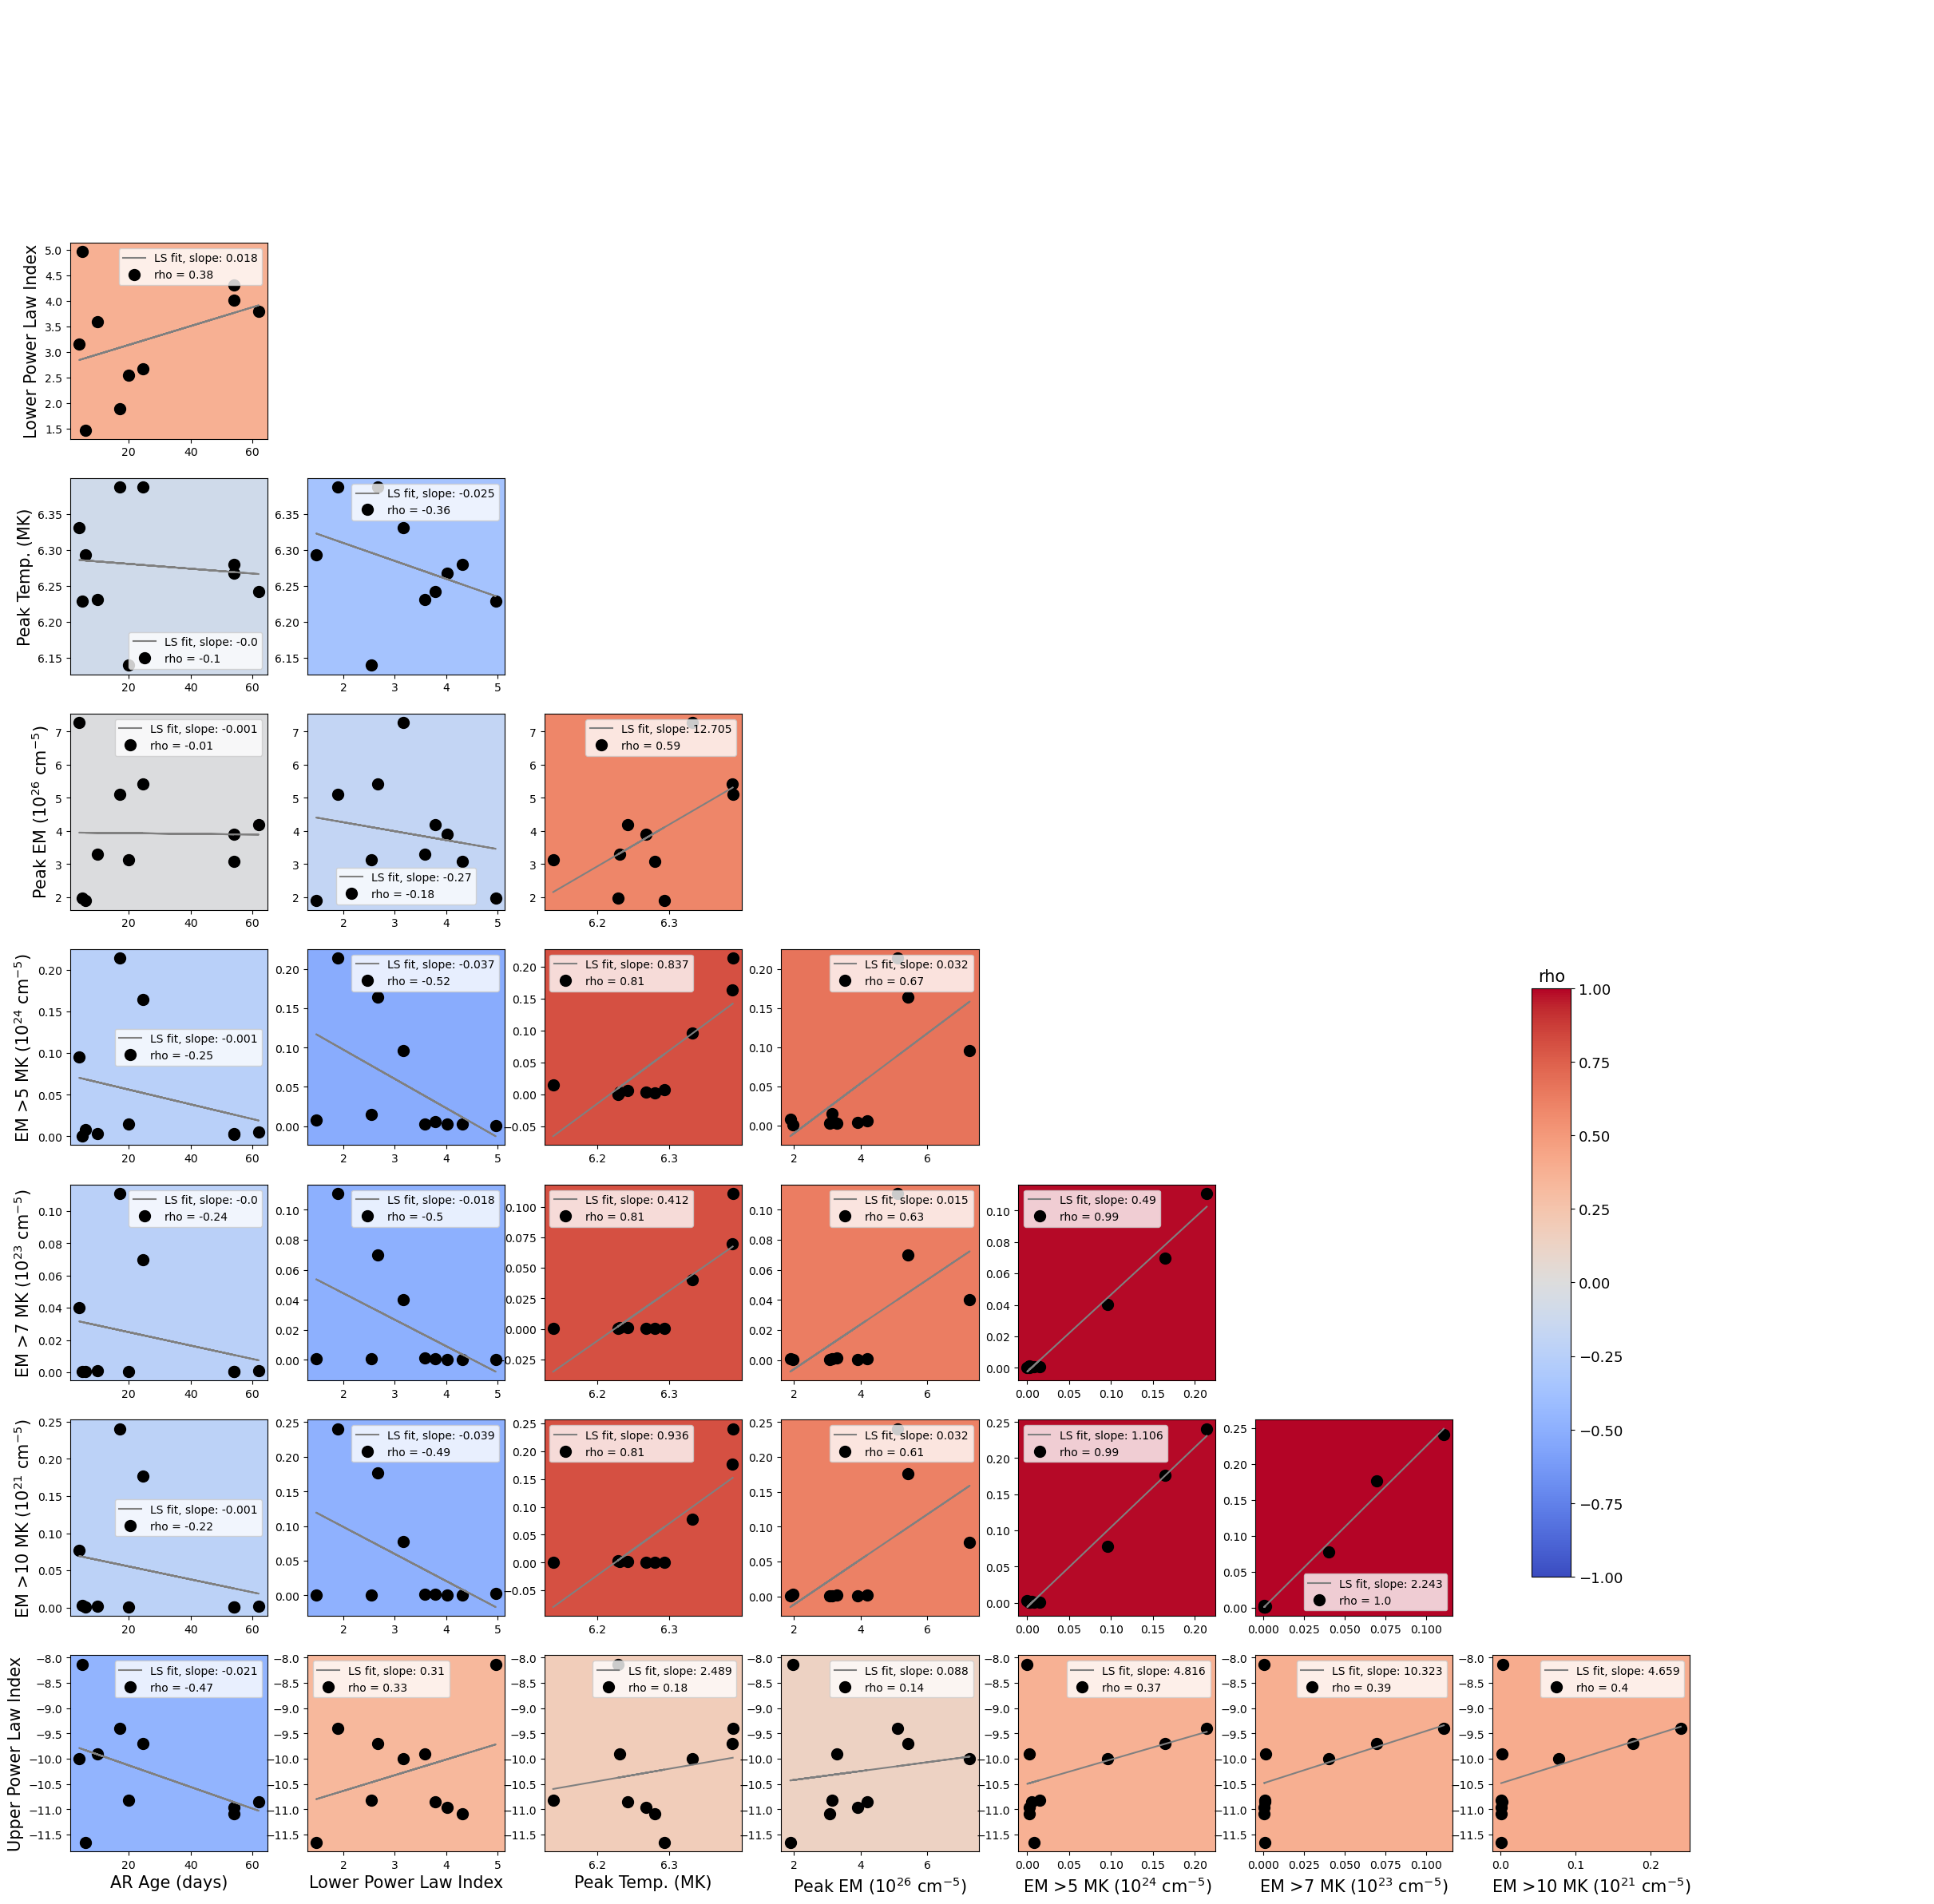

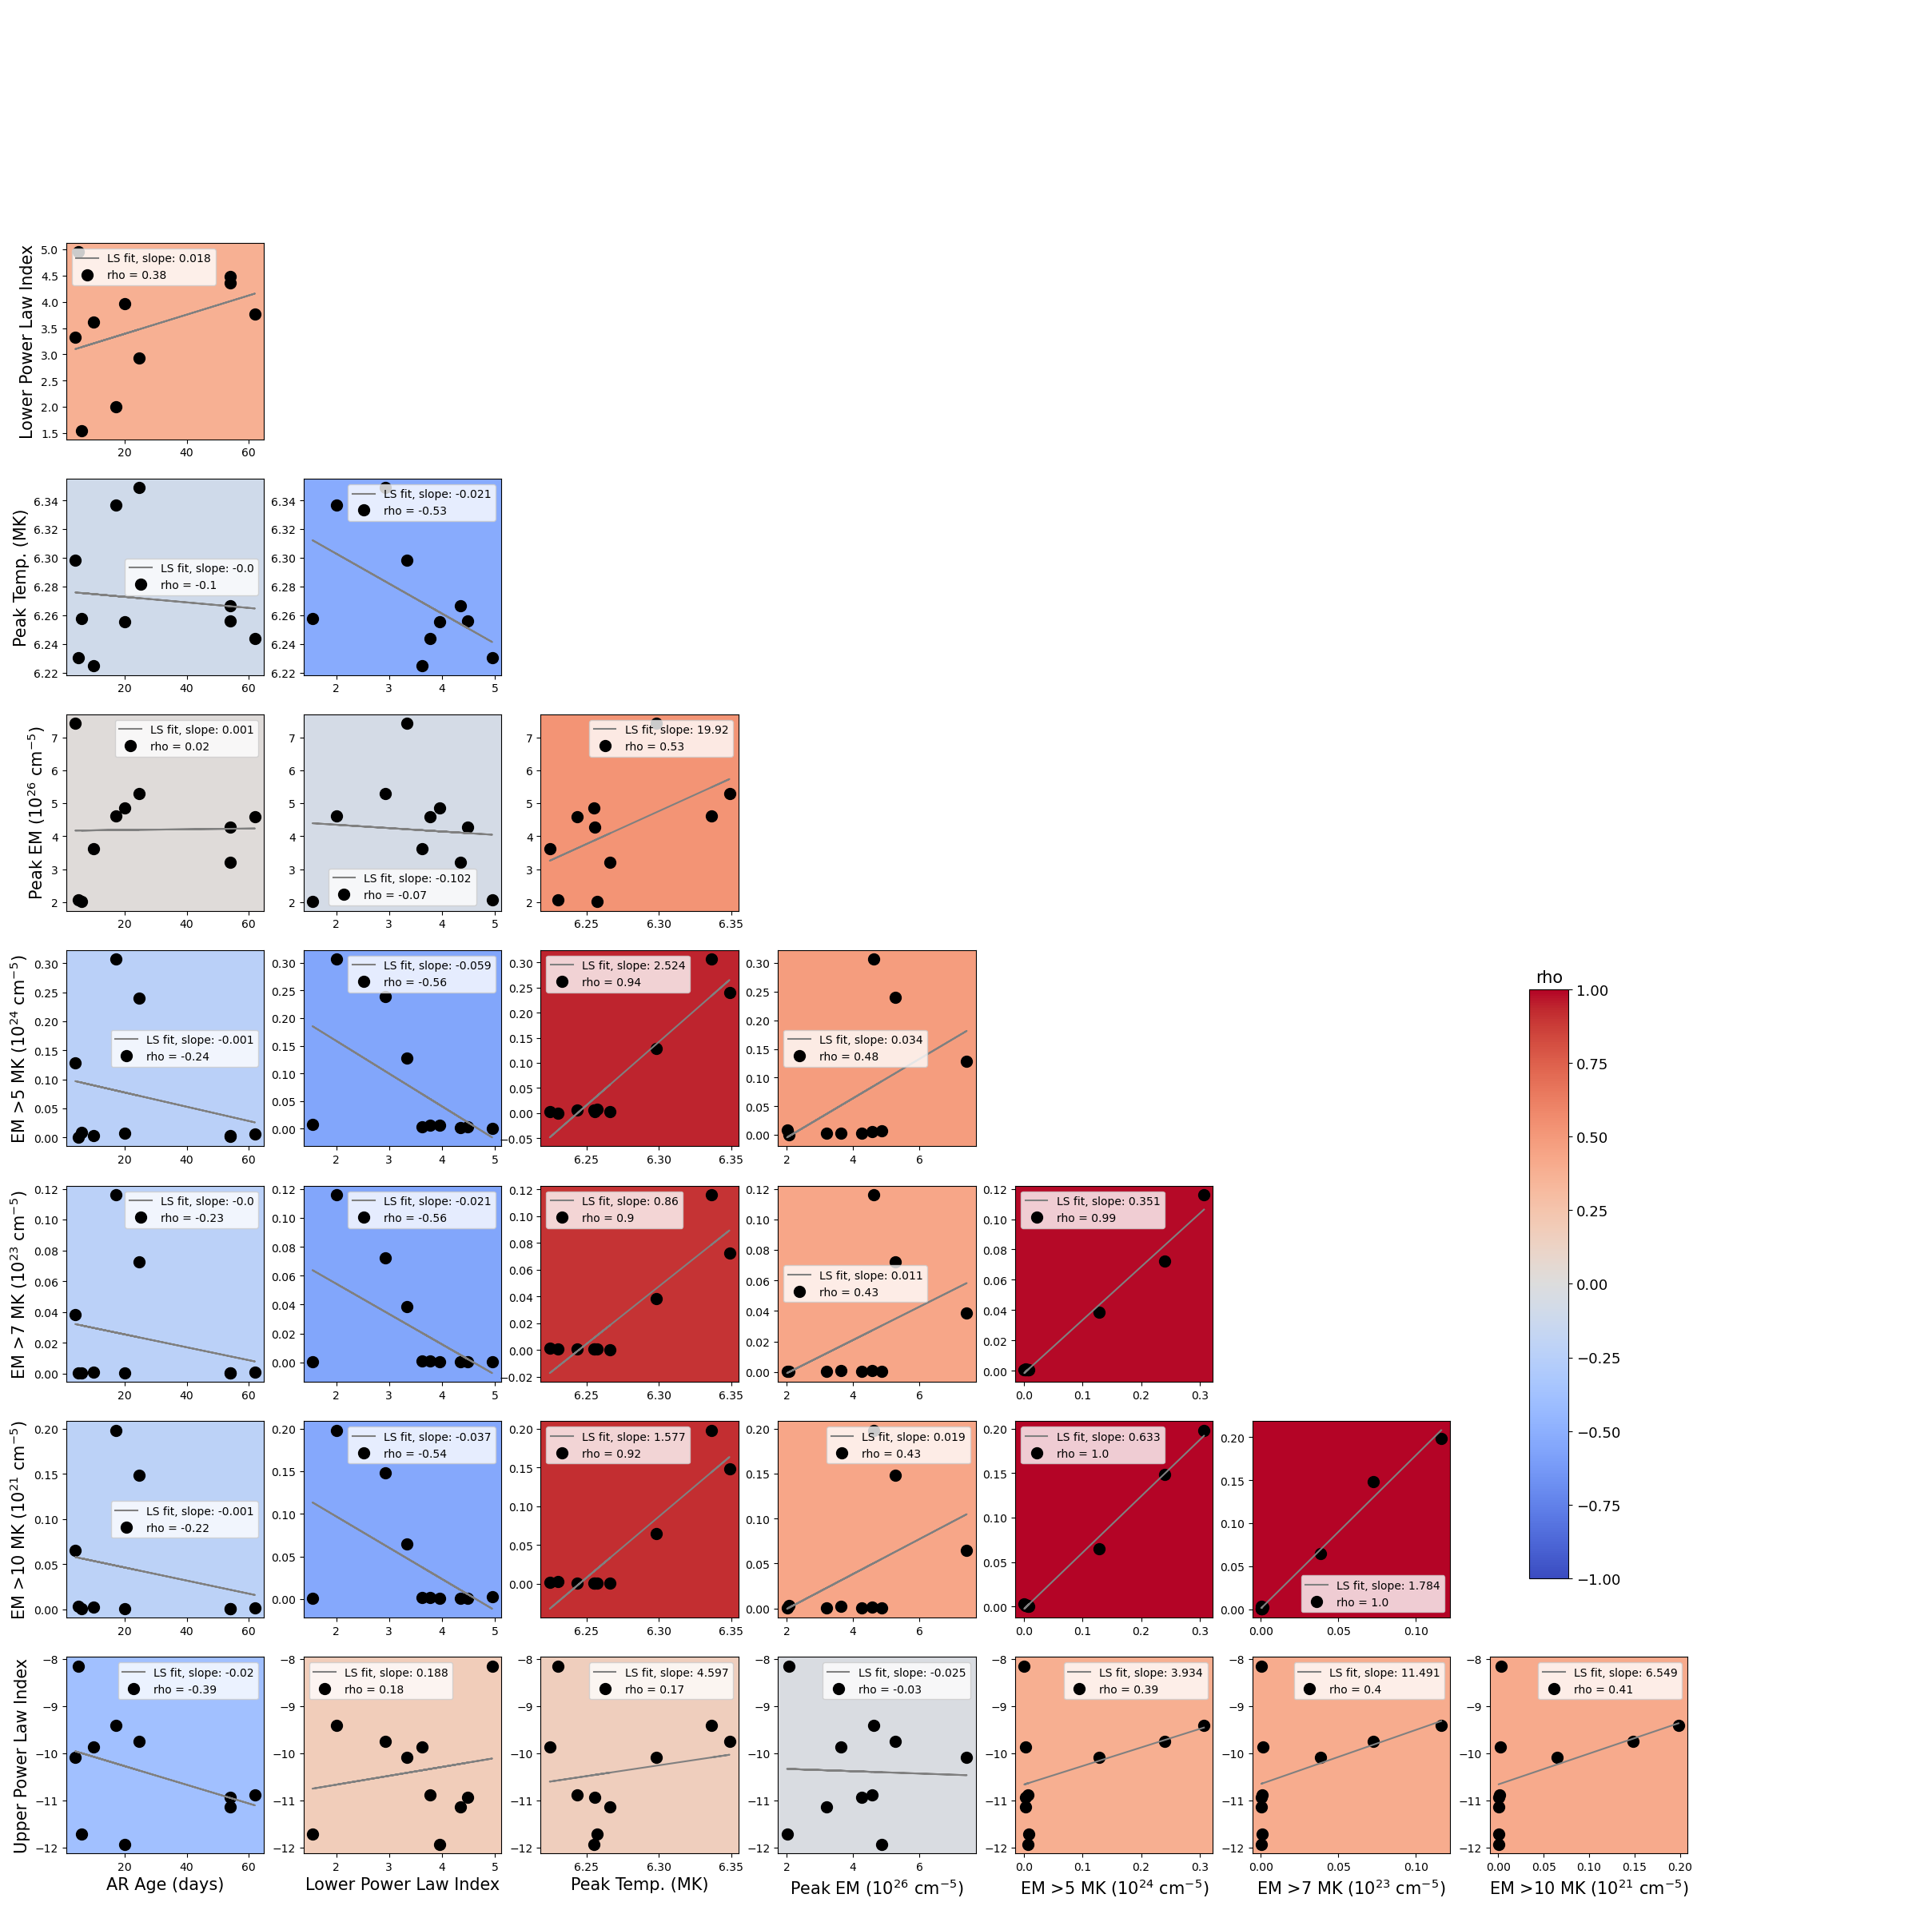

In [31]:
with open('/Users/jmdunca2/do-dem/reference_files/samesames.pickle', 'rb') as f:
    data = pickle.load(f)

samesames = data['same region lists']
filelist, agelist = get_same_region_file_lists(samesames, all_targets, get_agelists=True, aiaxrt=True)
filelist_no, agelist = get_same_region_file_lists(samesames, all_targets, get_agelists=True, noxrt=True)
filelist_all, agelist = get_same_region_file_lists(samesames, all_targets, get_agelists=True)


fnlist=[]
falist=[]
xagelist=[]
for i in range(0, len(filelist)):
    f = filelist[i]
    fa = filelist_all[i]
    fn = filelist_no[i]
    if f:
        xagelist.append(agelist[i])
        fas = []
        fns = []
        for file in f:
            timestring = file.split('/')[-2]
            #print(timestring)
            for afile in fa:
                if timestring in afile:
                    fas.append(afile)
            for nfile in fn:
                if timestring in nfile:
                    fns.append(nfile)

        falist.append(fas)
        fnlist.append(fns)
        #print('')

make_cornerplot(falist, xagelist, title='yesxrt_comp')
make_cornerplot(fnlist, xagelist, title='noxrt_comp')

In [70]:

filez = all_targets['01-nov-14_1']['res_file_dict(s)'][0]['quiet files all-inst']
a5s=[]
for f_ in filez:
    with open(f_, 'rb') as f:
        data = pickle.load(f)


    print('max: ', data['max'], data['max_temp'])
    print(data['above_5MK'][0])
    a5s.append(data['above_5MK'][0])
    print(data['above_7MK'])
    print(data['above_10MK'])
    print(data['powerlaws2'])
    print(data['powerlaws'])
    print('')

np.mean(a5s)

max:  3.760394085518881e+26 6.3071499845736145
9.081390280230587e+23
[1.0547771831747443e+22, 2.0498088361920433e+20, 4.756232215191926e+22]
[6.322199615132405e+19, 7.188689268806936e+17, 9.015927724853386e+20]
[(3.186118850830339, 0.11577136149006559, 6.643380555708803), (-10.60125110250882, 0.5415336761738648, 95.6370795438749)]
[(2.885458403388916, 0.19538177952409655, 8.459870759000738), (-9.534191144375367, 0.5963646205813222, 88.22092510753434)]

max:  3.775916326571271e+26 6.30755881264336
1.0509094100894636e+24
[4.1507538531756406e+22, 6.688266839598944e+21, 1.0921884049750657e+23]
[5.530469963636189e+20, 4.19891075936149e+19, 3.535828472171031e+21]
[(3.1907501601504653, 0.11583978975587184, 6.616116939865931), (-8.780924965245184, 0.4119436616270141, 83.68439636676045)]
[(2.8911512979324145, 0.19486184905008042, 8.426193399099988), (-7.952388318184183, 0.458370249051622, 77.92605294452868)]



9.795242190562612e+23

In [74]:
samesames

[['01-nov-14_1 region_0'],
 ['01-nov-14_1 region_1'],
 ['19-feb-16 region_0'],
 ['22-apr-16_2 region_0'],
 ['27-jul-16_1 region_0', '26-jul-16_1 region_0'],
 ['26-jul-16_1 region_1'],
 ['26-jul-16_2 region_0'],
 ['10-oct-17 region_0'],
 ['10-oct-17 region_1'],
 ['29-may-18_1 region_0'],
 ['29-may-18_2 region_0'],
 ['10-sep-18 region_0', '09-sep-18 region_0'],
 ['13-apr-19 region_0', '12-apr-19 region_0'],
 ['29-jan-20 region_0'],
 ['08-jun-20 region_0', '07-jun-20 region_0', '06-jun-20 region_0'],
 ['08-jan-21 region_0'],
 ['14-jan-21 region_0'],
 ['20-jan-21 region_0'],
 ['29-apr-21 region_0'],
 ['03-may-21_1 region_0'],
 ['03-may-21_2 region_0'],
 ['30-jul-21_1 region_0'],
 ['30-jul-21_1 region_1'],
 ['30-jul-21_2 region_0'],
 ['17-nov-21_1 region_0'],
 ['19-nov-21 region_0', '20-nov-21 region_0'],
 ['03-jun-22_2 region_0'],
 ['03-jun-22_2 region_1']]

In [59]:

filez = all_targets['29-may-18_1']['res_file_dict(s)'][0]['quiet files all-inst']

for f_ in filez:
    with open(f_, 'rb') as f:
        data = pickle.load(f)


    print('max: ', data['max'], data['max_temp'])
    print(data['above_5MK'])
    print(data['above_7MK'])
    print(data['above_10MK'])
    print(data['powerlaws2'])
    print(data['powerlaws'])
    print('')

max:  4.548714164606789e+26 6.345733599311923
[5.5632213802406896e+23, 1.9675416022197773e+22, 9.768686266294397e+23]
[2.660404800785307e+22, 4.6992282943292794e+20, 6.9083964761213495e+22]
[3.726943505701619e+20, 1.7002712270871311e+18, 1.7075013196504278e+21]
[(2.066863382088779, 0.053494949625639526, 13.57292097416808), (-9.369968784618473, 0.2582616364310065, 87.60351967337633)]
[(2.066863382088779, 0.053494949625639526, 13.57292097416808), (-8.669500759094754, 0.3385325668358092, 82.72373966729036)]

max:  4.544483390914589e+26 6.345812396105242
[6.917806940908867e+23, 6.797352286439627e+22, 1.0916742313844978e+24]
[4.572686094653353e+22, 1.59020314598712e+21, 1.0851300664095405e+23]
[7.016734647577301e+20, 5.643686813252013e+18, 3.818929542556785e+21]
[(2.0704959025749705, 0.052968655084354846, 13.549936962257268), (-8.90106617502952, 0.2799850178049578, 84.5476190395113)]
[(2.0704959025749705, 0.052968655084354846, 13.549936962257268), (-8.242309350875644, 0.3365055575291547, 79

0 0
1 0
2 0
0 1
1 1
2 1


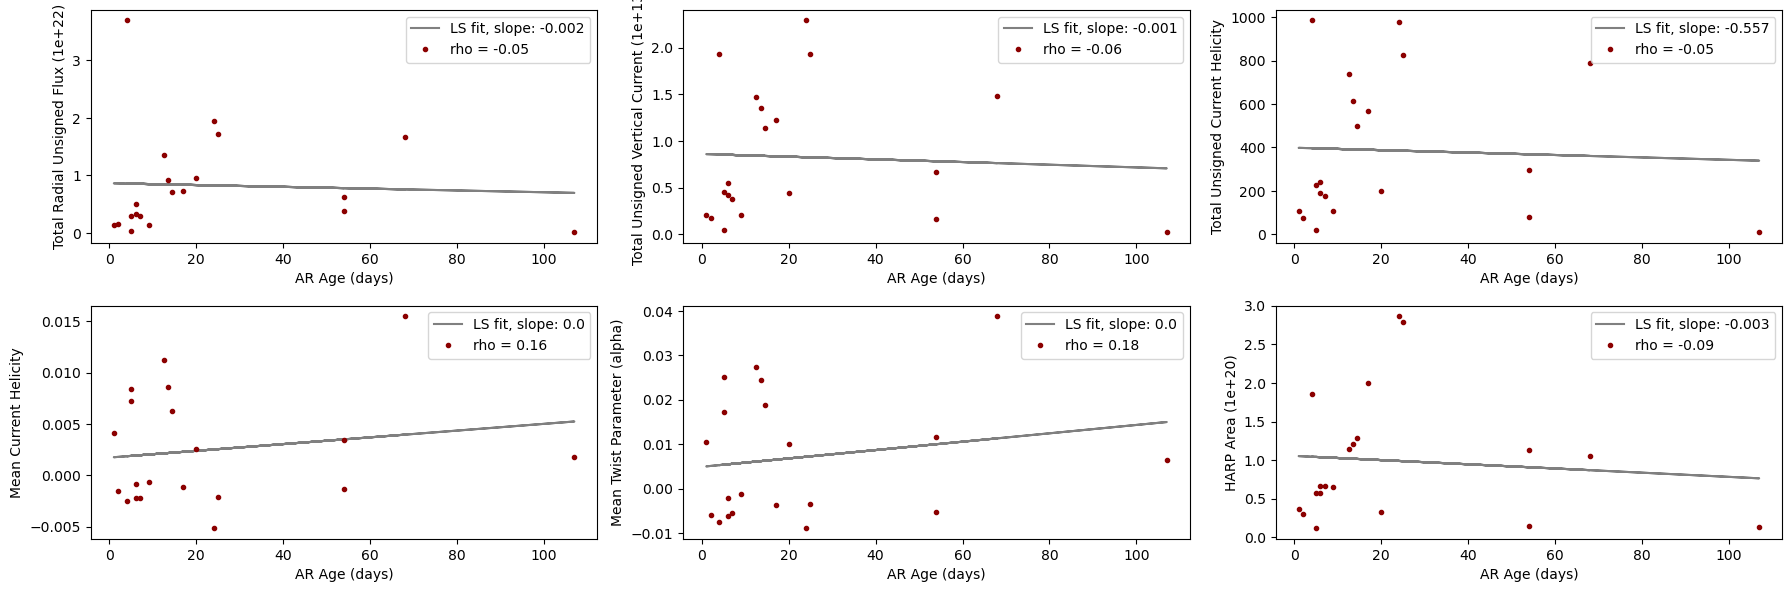

In [79]:
mparams = ['usflx', 'tuvc', 'tuheli', 'mheli', 'malp', 'areas']

fig, axes = plt.subplots(2,3, figsize=(3*len(mparams), 6), tight_layout = {'pad': 1})

magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)

regions = magparams['regions']['vals']

dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param='peak', return_stdvs=True,
                                                    skiphuh=False)

#Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]

ages = ages[trs,0]

for j in range(0, len(mparams)):
    print(j%3,int(j/3))
    ax=axes[int(j/3), j%3]
    magpar=magparams[mparams[j]]['vals']
    norm=magparams[mparams[j]]['norm']
    areanorm=1e20

    herr = magpar[:,1]/norm 
    wwy = [1/y for y in herr]

    #area=magparams['areas']['vals'][:,0]/areanorm
    
    
    rho=round(np.corrcoef(ages, magpar[:,0]/norm)[0,1],2)
    ax.errorbar(ages, magpar[:,0]/norm, color=tcolors[i], #yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3, label='rho = '+str(rho))
    
    #Fit option with y weights only
    m, b = np.polyfit(ages, magpar[:,0]/norm, 1) #, w=wwy)
    fity = np.array(ages)*m + b
    ax.plot(ages, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  


    
    if norm != 1:
        ax.set_ylabel(magparams[mparams[j]]['name']+' ('+"{:.0e}".format(norm)+')')
    else:
        ax.set_ylabel(magparams[mparams[j]]['name'])

    #ax.axvline((((150*u.arcsec*750*(u.km/u.arcsec))**2).to(u.cm**2).value)/areanorm, color='red', label='DEM Region Area')
    ax.set_xlabel('AR Age (days)')
    ax.legend()    

plt.savefig('mag_params_vs_AGE.png')

Below: draft versions and other explorations. 

In [ ]:
#MEGAPLOT - AREA NORMALIZED
importlib.reload(haa)

params = ['lowerpower2', 'peak', 'upperpower2', 'above10']
paramlabels = ['Lower Power Law Index', 'DEM Peak T (MK)', 'Upper Power Law Index', 'EM >10 MK (cm^-5)']
tcolors = ['orange', 'blue', 'teal', 'indianred']
skh = [False, False, False, False]

mparams = ['usflx', 'tuvc', 'tuheli', 'mheli', 'malp']

magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)

regions = magparams['regions']['vals']

fig, axes = plt.subplots(len(params),len(mparams), figsize=(5*len(mparams), 3*len(params)), tight_layout = {'pad': 1})

for i in range(0, len(params)):
    for j in range(0, len(mparams)):

        dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                    skiphuh=skh[i])

        #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
        trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
        yerr_ = stdvs[trs]
        wwy = [1/y for y in yerr_]
        

        #Plot vs. radial unsigned flux.
        ax=axes[i,j]
        magpar=magparams[mparams[j]]['vals']
        norm=magparams[mparams[j]]['norm']*(magparams['areas']['vals'][:,0]/1e20)

        herr = magpar[:,1]/norm 
        wwx = [1/y for y in herr]
    
        #[print(s) if (s not in sks) else print('') for s in regions]
        rho=round(np.corrcoef(magpar[:,0]/norm, dataparam[trs,0])[0,1],2)
    
        ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3, label='rho = '+str(rho))

        # #Fit option with y weights only
        m, b = np.polyfit(magpar[:,0]/norm, dataparam[trs,0], 1, w=wwy)
        fity = np.array(magpar[:,0]/norm)*m + b
        ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  


        
        if magparams[mparams[j]]['norm'] != 1:
            ax.set_xlabel('AREA NORMALIZED '+magparams[mparams[j]]['name']+' ('+"{:.0e}".format(magparams[mparams[j]]['norm'])+' '+magparams[mparams[j]]['unit'].to_string('latex')+')')
        else:
            ax.set_xlabel('AREA NORMALIZED '+magparams[mparams[j]]['name'])
        ax.set_ylabel(paramlabels[i])
        ax.legend()


plt.savefig('all_mag_params_area_normalized_postacc.png')

In [ ]:
from astropy import units as u
q=1e20*(u.cm)**2

print(f"{q:latex}")

In [ ]:
"""
Let's look more at some POWERLAWS - what do we get with the AIA-only DEM results? Looks like we replicate a similar 
relationship (good sanity check). 

"""

fig, axes = plt.subplots(2,2, figsize=(12, 6), tight_layout = {'pad': 1})


params = ['lowerpower', 'lowerpower2', 'lowerpower', 'lowerpower2']
         #'upperpower2', 'lowerpower2']
tcolors = ['indianred', 'orange', 'indianred', 'orange']
skh = [False, False, True, True]

i=1

for i in range(0, len(params)):

    dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], 
                                                     return_stdvs=True, filetype='quiet files onlyaia',
                                                    skiphuh=skh[i])  
    
    #print(dataparam.shape)
    #print(dataparam)
    #print(ages)
    #print(stdvs)
    
    
    
    ax=axes[(i//2),(i%2)]
    
    yerr_ = stdvs
    #print(yerr_)
    yerr1=yerr_

    #Trying to keep the stdv-weighted fit from being tugged away from the rest of the values by cases with only a few measurements
    ww = [1/y if y > 0.02 else 0.1*np.mean(yerr_) for y in yerr_]
    #print(ww)
    
    ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, linestyle='none', marker='o', markersize=3, label='stdv')
    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=ww)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color=tcolors[i])
    
    yerr_ = dataparam[:,1]
    #print('fit error > stdv: ', len(np.where(yerr_/yerr1 > 1.)[0]), len(yerr_))
    #ww = [1/y if y != 0 else np.mean(yerr_)/10 for y in yerr_]
    
    ax.errorbar(ages[:,0]-0.5, dataparam[:,0], color='blue', yerr=yerr_, linestyle='none', marker='o', markersize=3, label='fit error')
    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=1/yerr_)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color='blue')

    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')
    
    ax.set_title(params[i])
    ax.legend(loc='lower right')


print('Top panels: all regions')
print('Bottom panels: no 12-sep-17, 13-sep-17, 03-may-21_1, 03-may-21_2 (fit issues)')

In [ ]:
"""
Investigating various options for plotting/fitting/uncertainties, etc. for DEM power laws for the "all instrument"
(e.g. at least NuSTAR+AIA, sometimes with XRT) DEM results at quiet times. 

The conclusion for now is that we will use:

Lower Power Law:

-Modified fit method (upper boundary is index of DEM max + 1 - not fixed value)
-STDV of results from different time intervals as uncertainty. For cases with fewer than three time intervals, use the mean of all the 
    other (>3 measurement) cases.
-Linear trend fit uses both age and power law uncertainties. 

Upper Power Law:

-Modified fit method (upper boundary is temp. closest to logT=6.35 + 3 temp bin. - not + 1 temp bin)
-STDV of results from different time intervals as uncertainty. For cases with fewer than three time intervals, use the mean of all the 
    other (>3 measurement) cases.
-Linear trend fit uses both age and power law uncertainties. 
"""

fig, axes = plt.subplots(4,2, figsize=(12, 12), tight_layout = {'pad': 1})


params = [ 'upperpower', 'lowerpower',
         'upperpower2', 'lowerpower2',
         'lowerpower', 'lowerpower2']
tcolors = ['pink', 'indianred', 'powderblue', 'orange', 'indianred', 'orange']
skh = [False, False, False, False, True, True]

titles = ['Upper Power - og fit', 'Lower Power - og fit', 'Upper Power - modified fit', 'Lower Power - modified fit',
          'Upper Power - modified fit - remove bad fit cases', 'Lower Power - modified fit - remove bad fit cases',
          'Upper Power - modified fit - add age error', 'Lower Power - modified fit - add age error']



for i in range(0, len(params)):

    dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                    skiphuh=skh[i])  
    
    #print(dataparam.shape)
    #print(ages)
    #print(stdvs)
    
    
    
    ax=axes[(i//2),(i%2)]
    
    yerr_ = stdvs
    #print(yerr_)

    #Trying to keep the stdv-weighted fit from being tugged away from the rest of the values by cases with only a few measurements
    ww = [1/y if y > 0.02 else 1/np.mean(yerr_) for y in yerr_]
    #print(ww)
    
    ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, linestyle='none', marker='o', markersize=3, label='stdv')
    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=ww)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color=tcolors[i])
    
    yerr_ = dataparam[:,1]
    #ww = [1/y if y != 0 else np.mean(yerr_)/10 for y in yerr_]
    
    ax.errorbar(ages[:,0]-0.5, dataparam[:,0], color='blue', yerr=yerr_, linestyle='none', marker='o', markersize=3, label='fit error')
    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=1/yerr_)
    #print(m,b)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color='blue')

    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')
    
    ax.set_title(titles[i])
    ax.legend(loc='lower right')


from scipy import odr

#ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

def f(B, x):
    #Linear function
    return B[0]*x + B[1]
    
linear = odr.Model(f)


params = ['upperpower2', 'lowerpower2']
tcolors = ['powderblue', 'orange']
skh = [False, False]

for i in range(0, len(params)):

    dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                    skiphuh=skh[i])  

    
    ax=axes[3,(i%2)]
    
    yerr_ = stdvs
    ageerr = ages[:,0]-ages[:,1]
    #print(ageerr)
    
    #print(yerr_)

    #Trying to keep the stdv-weighted fit from being tugged away from the rest of the values by cases with only a few measurements
    wwy = [1/y if y > 0.02 else np.mean(yerr_) for y in yerr_]
    wwx = [1/y for y in ageerr]
    #print(wwy)
    #print(wwx)
    
    
    ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
                linestyle='none', marker='o', markersize=3, label='stdv')

    mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
    myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
    myoutput = myodr.run()
    #myoutput.pprint()
    m, b = myoutput.beta
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])
    
    # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1, w=ww)
    # fity = np.array(ages[:,0])*m + b
    # ax.plot(ages[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color=tcolors[i])
    
    yerr_ = dataparam[:,1]
    
    ax.errorbar(ages[:,0]-0.5, dataparam[:,0], color='blue', yerr=yerr_, xerr=ageerr,
                linestyle='none', marker='o', markersize=3, label='fit error')
    
    mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=1/yerr_)
    myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
    myoutput = myodr.run()
    #myoutput.pprint()
    m, b = myoutput.beta
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color='blue')

    m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
    fity = np.array(ages[:,0])*m + b
    ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')
    
    ax.set_title(titles[6+i])
    ax.legend(loc='lower right') 



# ax=axes[2,0]



# dataparam, ages, stdvs, sks = get_ages_vs_params(all_targets, param='lowerpower', return_stdvs=True)
# dataparam2, ages, stdvs2, sks = get_ages_vs_params(all_targets, param='lowerpower2', return_stdvs=True)

# ax.scatter(ages[:,0], dataparam[:,0], color='green')
# ax.scatter(ages[:,0], dataparam2[:,0], color='springgreen')

# print('')
# print('')

# #print(np.mean(dataparam[:,0]), np.mean(dataparam2[:,0]))
# #print(dataparam[:,0]/dataparam2[:,0])

# for i in range(0, len(dataparam[:,0])):
#     #if dataparam[i,0]/dataparam2[i,0] != 1. and stdvs[i,0] != 0.:
#     print(sks[i], dataparam[i,0], dataparam2[i,0], stdvs[i,0], stdvs2[i,0])
#     print(dataparam[i,0]/dataparam2[i,0])
#     print('')

#print('Third panels: no 12-sep-17, 13-sep-17, 03-may-21_1, 03-may-21_2 (fit issues)')

In [ ]:
# """
# Now we are going to make a TOTAL EM ABOVE CERTAIN THRESHOLDS plot that shows the relationships to age, 
# unsigned flux, and unsigned helicity. 

# """

# fig, axes = plt.subplots(1,3, figsize=(15, 6), tight_layout = {'pad': 1})


# from scipy import odr

# #ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

# def f(B, x):
#     #Linear function
#     return B[0]*x + B[1]
    
# linear = odr.Model(f)

# params = ['above10', 'above7', 'above5']
# tcolors = ['indianred', 'seagreen', 'steelblue']
# skh = [False, False, False]

# ages, hparr, hparl, heli, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)


# for i in range(0, len(params)):

#     dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
#                                                     skiphuh=skh[i])

#     #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
#     trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
#     yerr_ = stdvs[trs]
#     wwy = [1/y for y in yerr_]

#     #Plot vs. radial unsigned flux.
#     ax=axes[0]
#     norm=1e22

#     herr = hparr[:,1]/norm #/1e22
#     wwx = [1/y for y in herr]

#     #[print(s) if (s not in sks) else print('') for s in regions]

#     ax.errorbar(hparr[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label=params[i])

#     #Fit option with NO weights
#     # m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1)
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option with y weights only
#     m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     fity = np.array(hparr[:,0]/norm)*m + b
#     ax.plot(hparr[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color=tcolors[i])    

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(hparr[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     ax.axhspan(np.log10(1.8e22), np.log10(1.5e23), color='indianred', alpha=0.1)

#     #ax.set_title(titles[+i])
#     ax.legend(loc='lower right')
#     ax.set_xlabel('Active Region Radial Unsigned Flux  ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('(log) EM (cm^-5)')
#     ax.set_ylim([17,25])
    

#     #Plot vs. unsigned helicity.
#     ax=axes[1]
#     norm=1e13

#     herr = heli[:,1]/norm
#     wwx = [1/y for y in herr]

#     ax.errorbar(heli[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label=params[i])

#     #Fit option with y weights only
#     m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1)
#     fity = np.array(heli[:,0]/norm)*m + b
#     ax.plot(heli[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #Fit option with NO weights
#     # m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(heli[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     ax.axhspan(np.log10(1.8e22), np.log10(1.5e23), color='indianred', alpha=0.1)

#     #ax.set_title(titles[+i])
#     ax.legend() #loc='lower right') 
#     ax.set_xlabel('Active Region Total Unsigned Helicity ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('(log) EM (cm^-5)')
#     ax.set_ylim([17,25])
    

#     ax=axes[2]
    
#     yerr_ = stdvs
#     ageerr = ages[:,0]-ages[:,1]
#     wwy = [1/y for y in yerr_]
#     wwx = [1/y for y in ageerr]

#     ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
#                 linestyle='none', marker='o', markersize=3, label=params[i])

#     #Fit option with NO weights
#     # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
#     # fity = np.array(ages[:,0])*m + b
#     # ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
#     myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     myoutput = myodr.run()
#     m, b = myoutput.beta
#     fity = np.array(ages[:,0])*m + b
#     ax.plot(ages[:,0], fity, label='TLS fit, slope: '+str(round(m,3)), color=tcolors[i])
#     ax.axhspan(np.log10(1.8e22), np.log10(1.5e23), color='indianred', alpha=0.1)


#     #----------------------------------------------------------------------
#     #OPTION: plot only the HARP regions even for the age plot where others are available.
    
#     # yerr_ = stdvs[trs]
#     # ageerr = ages[trs,0]-ages[trs,1]    

#     # #
#     # wwy = [1/y for y in yerr_]
#     # wwx = [1/y for y in ageerr]


#     # ax.errorbar(ages[trs,0], dataparam[trs,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
#     #         linestyle='none', marker='o', markersize=3, label=params[i])
    
#     # mydata = odr.Data(ages[trs,0], dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(ages[trs,0])*m + b
#     # ax.plot(ages[trs,0], fity, label='TLS fit, slope: '+str(round(m,3)), color=tcolors[i])
#     # ax.axhspan(np.log10(1.8e22), np.log10(1.5e23), color='indianred', alpha=0.1)

#     #----------------------------------------------------------------------

    
#     #ax.set_title(titles[6+i])
#     ax.legend(loc='lower right') 
#     ax.set_xlabel('Active Region Age (days)')
#     ax.set_ylabel('(log) EM (cm^-5)')
#     ax.set_ylim([17,25])


# plt.savefig('EM_vs_external_all.png')   

In [ ]:
# """
# Now we are going to make a nice power law plot that includes, for both powerlaws, the relationships to age, 
# unsigned flux, and unsigned helicity. 

# """

# fig, axes = plt.subplots(2,3, figsize=(15, 6), tight_layout = {'pad': 1})


# from scipy import odr

# #ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

# def f(B, x):
#     #Linear function
#     return B[0]*x + B[1]
    
# linear = odr.Model(f)

# params = ['lowerpower2', 'upperpower2']
# tcolors = ['orange', 'teal']
# skh = [False, False]

# ages, hparr, hparl, heli, mheli, malp, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)


# for i in range(0, len(params)):

#     dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
#                                                     skiphuh=skh[i])

#     #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
#     trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
#     yerr_ = stdvs[trs]
#     wwy = [1/y for y in yerr_]

#     #Plot vs. radial unsigned flux.
#     ax=axes[i,0]
#     norm=1e22

#     herr = hparr[:,1]/norm #/1e22
#     wwx = [1/y for y in herr]

#     #[print(s) if (s not in sks) else print('') for s in regions]

#     ax.errorbar(hparr[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1)
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option with y weights only
#     m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     fity = np.array(hparr[:,0]/norm)*m + b
#     ax.plot(hparr[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')    

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(hparr[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend(loc='lower right')
#     ax.set_xlabel('Active Region Radial Unsigned Flux  ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Index')
    

#     #Plot vs. unsigned helicity.
#     ax=axes[i, 1]
#     norm=1e13

#     herr = heli[:,1]/norm
#     wwx = [1/y for y in herr]

#     ax.errorbar(heli[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with y weights only
#     m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1)
#     fity = np.array(heli[:,0]/norm)*m + b
#     ax.plot(heli[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')

#     #Fit option with NO weights
#     # m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(heli[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend() #loc='lower right') 
#     ax.set_xlabel('Active Region Total Unsigned Helicity ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Index')

    

#     ax=axes[i, 2]
    
#     yerr_ = stdvs
#     ageerr = ages[:,0]-ages[:,1]

    

#     #
#     wwy = [1/y for y in yerr_]
#     wwx = [1/y for y in ageerr]

#     ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
#     # fity = np.array(ages[:,0])*m + b
#     # ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
#     myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     myoutput = myodr.run()
#     m, b = myoutput.beta
#     fity = np.array(ages[:,0])*m + b
#     ax.plot(ages[:,0], fity, label='TLS fit, slope: '+str(round(m,3)), color='black')

#     #ax.set_title(titles[6+i])
#     ax.legend(loc='lower right') 
#     ax.set_xlabel('Active Region Age (days)')
#     ax.set_ylabel('Index')

# plt.savefig('powerlaws_vs_external.png')

In [ ]:
# """
# Now we are going to make a nice power law plot that includes, for both powerlaws, the relationships to age, 
# unsigned flux, and unsigned helicity. 

# """

# fig, axes = plt.subplots(2,3, figsize=(15, 6), tight_layout = {'pad': 1})


# from scipy import odr

# #ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

# def f(B, x):
#     #Linear function
#     return B[0]*x + B[1]
    
# linear = odr.Model(f)

# params = ['lowerpower2', 'upperpower2']
# tcolors = ['orange', 'teal']
# skh = [False, False]

# ages, hparr, hparl, heli, mheli, malp, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)


# for i in range(0, len(params)):

#     dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
#                                                     skiphuh=skh[i])

#     #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
#     trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
#     yerr_ = stdvs[trs]
#     wwy = [1/y for y in yerr_]

#     #Plot vs. radial unsigned flux.
#     ax=axes[i,0]
#     norm=1 #e22
#     magpar=mheli

#     herr = magpar[:,1]/norm #/1e22
#     wwx = [1/y for y in herr]

#     #[print(s) if (s not in sks) else print('') for s in regions]

#     ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1)
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option with y weights only
#     m, b = np.polyfit(magpar[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     fity = np.array(magpar[:,0]/norm)*m + b
#     ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')    

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(hparr[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend(loc='lower right')
#     ax.set_xlabel('Active Region Mean Current Helicity  ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Index')
    

#     #Plot vs. unsigned helicity.
#     ax=axes[i, 1]
#     norm=1 #e13
#     magpar=malp

#     herr = magpar[:,1]/norm
#     wwx = [1/y for y in herr]

#     ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with y weights only
#     m, b = np.polyfit(magpar[:,0]/norm, dataparam[trs,0], 1)
#     fity = np.array(magpar[:,0]/norm)*m + b
#     ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')

#     #Fit option with NO weights
#     # m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(heli[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend() #loc='lower right') 
#     ax.set_xlabel('Active Region Mean ALP ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Index')

    

#     ax=axes[i, 2]
    
#     yerr_ = stdvs
#     ageerr = ages[:,0]-ages[:,1]

    

#     #
#     wwy = [1/y for y in yerr_]
#     wwx = [1/y for y in ageerr]

#     ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
#     # fity = np.array(ages[:,0])*m + b
#     # ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
#     myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     myoutput = myodr.run()
#     m, b = myoutput.beta
#     fity = np.array(ages[:,0])*m + b
#     ax.plot(ages[:,0], fity, label='TLS fit, slope: '+str(round(m,3)), color='black')

#     #ax.set_title(titles[6+i])
#     ax.legend(loc='lower right') 
#     ax.set_xlabel('Active Region Age (days)')
#     ax.set_ylabel('Index')

# plt.savefig('powerlaws_vs_external_mheli_malp.png')

In [ ]:
# """
# Now we are going to make a nice power law plot that includes, for both powerlaws, the relationships to age, 
# unsigned flux, and unsigned helicity. 

# """

# fig, axes = plt.subplots(1,3, figsize=(15, 3), tight_layout = {'pad': 1})


# from scipy import odr

# #ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

# def f(B, x):
#     #Linear function
#     return B[0]*x + B[1]
    
# linear = odr.Model(f)

# params = ['peak']
# tcolors = ['blue']
# skh = [False]

# ages, hparr, hparl, heli, mheli, malp, regions = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)


# for i in range(0, len(params)):

#     dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
#                                                     skiphuh=skh[i])

#     #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
#     trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
#     yerr_ = stdvs[trs]
#     wwy = [1/y for y in yerr_]

#     #Plot vs. radial unsigned flux.
#     ax=axes[0]
#     norm=1e22

#     herr = hparr[:,1]/norm #/1e22
#     wwx = [1/y for y in herr]

#     #[print(s) if (s not in sks) else print('') for s in regions]

#     ax.errorbar(hparr[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1)
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option with y weights only
#     m, b = np.polyfit(hparr[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     fity = np.array(hparr[:,0]/norm)*m + b
#     ax.plot(hparr[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')    

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(hparr[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(hparr[:,0]/norm)*m + b
#     # ax.plot(hparr[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend(loc='lower right')
#     ax.set_xlabel('Active Region Radial Unsigned Flux  ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Temp. (MK)')
    

#     #Plot vs. unsigned helicity.
#     ax=axes[1]
#     norm=1e13

#     herr = heli[:,1]/norm
#     wwx = [1/y for y in herr]

#     ax.errorbar(heli[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with y weights only
#     m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1)
#     fity = np.array(heli[:,0]/norm)*m + b
#     ax.plot(heli[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')

#     #Fit option with NO weights
#     # m, b = np.polyfit(heli[:,0]/norm, dataparam[trs,0], 1, w=wwy)
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     #Fit option which uses x, y weights 
#     # mydata = odr.Data(heli[:,0]/norm, dataparam[trs,0], wd=wwx, we=wwy)
#     # myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     # myoutput = myodr.run()
#     # m, b = myoutput.beta
#     # fity = np.array(heli[:,0]/norm)*m + b
#     # ax.plot(heli[:,0]/norm, fity, linestyle='dotted', label='TLS linear fit, slope: '+str(round(m,3)), color=tcolors[i])

#     #ax.set_title(titles[+i])
#     ax.legend() #loc='lower right') 
#     ax.set_xlabel('Active Region Total Unsigned Helicity ('+"{:.0e}".format(norm)+')')
#     ax.set_ylabel('Temp (MK)')

    

#     ax=axes[2]
    
#     yerr_ = stdvs
#     ageerr = ages[:,0]-ages[:,1]    

#     #
#     wwy = [1/y for y in yerr_]
#     wwx = [1/y for y in ageerr]

#     ax.errorbar(ages[:,0], dataparam[:,0], color=tcolors[i], yerr=yerr_, xerr=ageerr, 
#                 linestyle='none', marker='o', markersize=3, label='stdv')

#     #Fit option with NO weights
#     # m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
#     # fity = np.array(ages[:,0])*m + b
#     # ax.plot(ages[:,0], fity, linestyle='dotted', label='unweighted linear fit, slope: '+str(round(m,3)), color='black')

#     mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
#     myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     myoutput = myodr.run()
#     m, b = myoutput.beta
#     fity = np.array(ages[:,0])*m + b
#     ax.plot(ages[:,0], fity, label='TLS fit, slope: '+str(round(m,3)), color='black')

#     #ax.set_title(titles[6+i])
#     ax.legend(loc='lower right') 
#     ax.set_xlabel('Active Region Age (days)')
#     ax.set_ylabel('Temp. (MK)')

# plt.savefig('peaks_vs_external.png')

In [ ]:
#MEGAPLOT
importlib.reload(haa)

params = ['lowerpower2', 'peak', 'upperpower2', 'above10']
paramlabels = ['Lower Power Law Index', 'DEM Peak T (MK)', 'Upper Power Law Index', 'EM >10 MK (cm^-5)']
tcolors = ['orange', 'blue', 'teal', 'indianred']
skh = [False, False, False, False]

mparams = ['usflx', 'tuvc', 'tuheli', 'mheli', 'malp']

magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)

regions = magparams['regions']['vals']

fig, axes = plt.subplots(len(params),len(mparams), figsize=(5*len(mparams), 3*len(params)), tight_layout = {'pad': 1})

for i in range(0, len(params)):
    for j in range(0, len(mparams)):

        dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                    skiphuh=skh[i])

        #Get indices of regions that are within the longitude threshold (to plot DEM params vs HARP params)
        trs = np.where(np.array([1 if s in regions else 0 for s in sks]) == 1)[0]
        yerr_ = stdvs[trs]
        wwy = [1/y for y in yerr_]
        

        #Plot vs. radial unsigned flux.
        ax=axes[i,j]
        magpar=magparams[mparams[j]]['vals']
        norm=magparams[mparams[j]]['norm']

        herr = magpar[:,1]/norm 
        wwx = [1/y for y in herr]
    
        #[print(s) if (s not in sks) else print('') for s in regions]
    
        ax.errorbar(magpar[:,0]/norm, dataparam[trs,0], color=tcolors[i], yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3)

        #Fit option with y weights only
        m, b = np.polyfit(magpar[:,0]/norm, dataparam[trs,0], 1, w=wwy)
        fity = np.array(magpar[:,0]/norm)*m + b
        ax.plot(magpar[:,0]/norm, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  


        
        if norm != 1:
            ax.set_xlabel(magparams[mparams[j]]['name']+' ('+"{:.0e}".format(norm)+')')
        else:
            ax.set_xlabel(magparams[mparams[j]]['name'])
        ax.set_ylabel(paramlabels[i])
        ax.legend()


plt.savefig('all_mag_params.png')

In [ ]:
importlib.reload(haa)

mparams = ['usflx', 'tuvc', 'tuheli', 'mheli', 'malp']

fig, axes = plt.subplots(1,len(mparams), figsize=(5*len(mparams), 4), tight_layout = {'pad': 1})

magparams = haa.fetch_age_and_usflux(all_targets, lonthresh=60, plot=False, check_quiet=True)

for j in range(0, len(mparams)):
    ax=axes[j]
    magpar=magparams[mparams[j]]['vals']
    norm=magparams[mparams[j]]['norm']
    areanorm=1e20

    if mparams[j] == 'mheli':
        for m in range(0, len(magpar[:,0])):
            print(round(magpar[:,0][m],3), round(area[m], 3), regions[m])

    herr = magpar[:,1]/norm 
    wwy = [1/y for y in herr]

    area=magparams['areas']['vals'][:,0]/areanorm
    

    ax.errorbar(area, magpar[:,0]/norm, color=tcolors[i], #yerr=yerr_, #xerr=herr, 
                    linestyle='none', marker='o', markersize=3)
    
    #Fit option with y weights only
    m, b = np.polyfit(area, magpar[:,0]/norm, 1) #, w=wwy)
    fity = np.array(area)*m + b
    ax.plot(area, fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  


    
    if norm != 1:
        ax.set_ylabel(magparams[mparams[j]]['name']+' ('+"{:.0e}".format(norm)+')')
    else:
        ax.set_ylabel(magparams[mparams[j]]['name'])

    ax.axvline((((150*u.arcsec*750*(u.km/u.arcsec))**2).to(u.cm**2).value)/areanorm, color='red', label='DEM Region Area')
    ax.set_xlabel('HARP Area '+' ('+"{:.0e}".format(areanorm)+' cm^2)')
    ax.legend()    

plt.savefig('mag_params_vs_harp_area.png')

In [ ]:
#MEGAPLOT - AREA NORMALIZED
importlib.reload(haa)

from scipy import odr

#ODR documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/odr.html

def f(B, x):
    #Linear function
    return B[0]*x + B[1]
    
linear = odr.Model(f)

params = ['dn_in']
paramlabels = ['DN']
tcolors = ['darkgreen','darkcyan','gold','sienna','indianred','darkorange']
aiachannels = [94, 131, 171, 193, 211, 335]
skh = [False, False, False, False]


labelsize=20

fig, axes = plt.subplots(6,1, figsize=(8, 20), tight_layout = {'pad': 1}, sharex='col')

for i in range(0, len(params)):

    dataparam, ages, stdvs, sks = haa.get_ages_vs_params(all_targets, param=params[i], return_stdvs=True,
                                                skiphuh=skh[i])

    ageorder = np.argsort(ages[:,0])
    print(ages[:,0][ageorder])
    skorder = [sks[a] for a in ageorder]
    print(skorder)

    for j in range(0,6):
        ax=axes[j]
        
#     yerr_ = stdvs
#     wwy = [1/y for y in yerr_]
    

#     #Plot vs. age
#     ax=axes[i]



#     herr = ages[:,0]-ages[:,1]
#     wwx = [1/y for y in herr]

#     #[print(s) if (s not in sks) else print('') for s in regions]

        rho=round(np.corrcoef(ages[:,0], dataparam[:,j])[0,1],2)
        ax.errorbar(ages[:,0], dataparam[:,j], color=tcolors[j], #yerr=yerr_, xerr=herr, 
                    linestyle='none', marker='o', markersize=5, label='AIA '+str(aiachannels[j])+', rho = '+str(rho))

        #Fit option with y weights only
        m, b = np.polyfit(ages[:,0], dataparam[:,j], 1, w=wwy)
        fity = np.array(ages[:,0])*m + b
        ax.plot(ages[:,0], fity, label='LS fit, slope: '+str(round(m,3)), color='grey')  

#     #Fit option with both weights
#     mydata = odr.Data(ages[:,0], dataparam[:,0], wd=wwx, we=wwy)
#     myodr = odr.ODR(mydata, linear, beta0=[0.,1.]) # how to put beta0 values here
#     myoutput = myodr.run()
#     #myoutput.pprint()
#     m, b = myoutput.beta
#     fity = np.array(ages[:,0])*m + b
#     ax.plot(ages[:,0], fity, label='TLS linear fit, slope: '+str(round(m,3)), color='black')


        if j==6:
            ax.set_xlabel('AR Age (days)', fontsize=labelsize)
        ax.set_ylabel(paramlabels[i], fontsize=labelsize)
        ax.legend(fontsize=labelsize)
        ax.tick_params(axis='both', which='major', labelsize=14) 


plt.savefig('aia_vs_age.png')

In [ ]:
from astropy import units as u
((150*u.arcsec*750*(u.km/u.arcsec))**2).to(u.cm**2)

In [ ]:
((150*u.arcsec*750*(u.km/u.arcsec))**2).to(u.cm**2).value

In [ ]:
# #Big initial reference plot of other stuff vs. age.

# fig, axes = plt.subplots(6,2, figsize=(12, 18), tight_layout = {'pad': 1})


# #Parameter to fetch from the result files, using get_ages_vs_params()
# params = ['above10', 'above7', 'above5', 'spexkT', 
#           'upperpower', 'lowerpower', 'upperpower','lowerpower', 
#          'upperpower2', 'lowerpower2', 'upperpower2', 'lowerpower2']

# ylabels = ['log EM integrated above 10 MK', 'log EM integrated above 7 MK', 'log EM integrated above 5 MK', 
#            'Isothermal Fit T (MK)', 
#            'Upper Power Law Index', 'Lower Power Law Index', 'Upper Power Law Index Fit Error', 'Lower Power Law Index Fit Error',
#           'Upper Power Law Index 2', 'Lower Power Law Index 2', 'Upper Power Law Index 2 Fit Error', 'Lower Power Law Index 2 Fit Error']
           
# tcolors = ['dodgerblue', 'purple', 'gold', 'green', 
#            'pink', 'indianred', 'powderblue', 'orange', 
#            'pink', 'indianred','powderblue', 'orange']

# #Index of parameter output from get_ages_vs_params(). 
# #Differs from 0 when parameter has uncertainty, etc, included + you want to plot that.
# pind = [0, 0, 0, 0, 
#             0, 0, 1, 1,
#             0, 0, 1, 1]

# for i in range(0, len(params)):

#     ax=axes[(i//2),(i%2)]

#     if params[i] != 'spexkT':

#         dataparam, ages = haa.get_ages_vs_params(all_targets, param=params[i])    
#         ax.scatter(ages[:,0], dataparam[:,pind[i]], color=tcolors[i])
#         m, b = np.polyfit(ages[:,0], dataparam[:,pind[i]], 1)
#         fity = ages[:,0]*m + b
#         ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolors[i], label='linear fit, slope: '+str(round(m,3)))
#         ax.legend()
#         ax.set_ylabel(ylabels[i])
#         ax.set_xlabel('AR Age (days)')
